## import librarys and the main data frame

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
file1 = r'/content/DataFrame.csv'
df = pd.read_csv(file1, encoding='latin1')


In [ ]:
#Uploading the Rain data to data frame
file2 = r'/content/RainAmout.csv'
df_rain = pd.read_csv(file2)

##EDA PROCCESS


In [ ]:
df.shape

(8927, 41)

In [ ]:
def DeleteNulls(df):
    #droping all the null values from the target columns
    df.dropna(subset=['Fecal Streptococcus/Enterococcus cfu/100ml','Fecal Coliform cfu/100ml',
                  'Total Bacterial Count cfu/ml'],
                            how='all',inplace=True)
    # droping all the valuse that have more then 85% nulls in the new df.
    lst = []
    for i in df.columns:
        if df[i].isnull().sum()/df.shape[0]*100 > 85 or df[i].nunique() == 1:
                  lst.append(i)
        else:
                    continue
    #drop rows with more then 70% nulls value
    #df.dropna(thresh = df.shape[1]*0.7, inplace = True)
    dropped = df.drop(lst, axis = 1 )
    df.drop(lst, axis = 1, inplace = True)
    return (df.shape)

In [ ]:
DeleteNulls(df)

(144, 38)

In [ ]:

#delete column none relevant
delete = df[['time_ISO8601', 'Particulate -N- (uMol/L)', 'Particulate -P- (uMol/L)', 'Total - N- (uMol/L)', 'Total - P- (uMol/L)',
             'Bot. Depth [m]','Bact conc. (#/ml)', 'Phyto conc. (#/ml)', 'Unnamed: 39', 'comments', 'Cruise',
             'Longitude (degrees east)','Latitude (degrees north)','wind (kn)']]
df.drop(delete, axis = 1, inplace = True)

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Station                                        0
dd/mm/yyyy                                     0
HH:MM                                          2
Depth (m)                                      1
Temp (degC)                                    3
Salinity (PSU)                                 3
DO (uM)                                        9
DO%                                            9
OBS (NTU)                                      9
Chl Fluo (AU)                                 26
Extracted Chlorophyll (ug/L)                   7
BOD 5 (mg/L)                                   5
TSS (mg/L)                                     6
POM (mg/L)                                     6
PIM mg/L                                       7
PO4 (uMol/L)                                  14
NH4 (uMol/L)                                  45
NO2 (uM/L)                                     6
NO3 (uMol/L)                                   7
Fecal Streptococcus/Enterococcus cfu/100ml     0
Fecal Coliform cfu/1

In [ ]:
df.shape

(144, 24)

In [ ]:
df.head()

,Station,dd/mm/yyyy,HH:MM,Depth (m),Temp (degC),Salinity (PSU),DO (uM),DO%,OBS (NTU),Chl Fluo (AU),...,PIM mg/L,PO4 (uMol/L),NH4 (uMol/L),NO2 (uM/L),NO3 (uMol/L),Fecal Streptococcus/Enterococcus cfu/100ml,Fecal Coliform cfu/100ml,Total Bacterial Count cfu/ml,Secchi (m),clouds (%)
132,A1,01/04/2014,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,1.75,3.33,39.79,11.00,262.79,79.0,32.00,680.0,NaN,0.1
224,A5,01/04/2014,12:50,0.18,20.94,18.06,464.0,185.35,0.09,34.4,...,3.00,1.03,94.35,19.00,110.37,24.0,52.00,1200.0,0.31,0.5
448,A1,26/06/2014,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,NaN,33.46,183.84,13.30,34.97,3900.0,1900.00,11000.0,0.58,0.0
536,A5,26/06/2014,09:50,0.10,28.27,11.04,308.0,134.86,1.71,18.8,...,12.50,11.03,8.61,2.19,8.67,1600.0,210.00,12000.0,0.39,0.1
649,A1,27/08/2014,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,62.00,18.46,650.65,71.68,213.63,1500.0,340.00,3600.0,ðàáã äñøè úåôøú,0.0


In [ ]:
#delete rows with 'A5' value in Station column
df = df[df.Station != 'A5']

In [ ]:
df.shape

(131, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 132 to 4870
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Station                                     131 non-null    object 
 1   dd/mm/yyyy                                  131 non-null    object 
 2   HH:MM                                       130 non-null    object 
 3   Depth (m)                                   130 non-null    float64
 4   Temp (degC)                                 129 non-null    float64
 5   Salinity (PSU)                              129 non-null    float64
 6   DO (uM)                                     123 non-null    float64
 7   DO%                                         123 non-null    float64
 8   OBS (NTU)                                   124 non-null    float64
 9   Chl Fluo (AU)                               106 non-null    float64
 10  Extracted C

## join the Rain, Eid El-Fiter and Seasons data sets.

In [ ]:
#Createing a column of months and years from date
df['dd/mm/yyyy'] = pd.to_datetime(df['dd/mm/yyyy'])

df['Month'] = df['dd/mm/yyyy'].dt.month
df['year'] = df['dd/mm/yyyy'].dt.year

<ipython-input-772-58d0670fa48b>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-772-58d0670fa48b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-772-58d0670fa48b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-772-58d0670fa48b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a Da

In [ ]:
df['dd/mm/yyyy'] = df['dd/mm/yyyy'].dt.date

<ipython-input-773-be739c9b36d0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.shape


(131, 26)

In [ ]:
df['dd/mm/yyyy'] = df['dd/mm/yyyy'].astype(str)

<ipython-input-775-6b358838a275>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Eid al-Adha (חג הקורבן)
# Define a list of start and end dates of the holiday
dates = [('2014-10-04', '2014-10-10'), ('2015-09-23', '2015-09-29'),('2016-09-12', '2016-09-18'),('2017-08-31', '2017-09-06'),('2018-08-20', '2018-08-26'),('2019-08-10', '2019-08-16')
,('2020-07-30', '2020-08-05'),('2021-07-19', '2021-07-25'),('2022-07-08', '2022-07-14')]

# Add a new column with the value 1 for rows where the date is between any of the start and end dates
df['Holiday'] = df.apply(lambda row: 1 if any(row['dd/mm/yyyy'] >= start_date and row['dd/mm/yyyy']<= end_date for start_date, end_date in dates) else 0, axis=1)

<ipython-input-776-1741bbe49026>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#checking how many testing taken in the חג הקורבן
df.Holiday.sum()

1

In [ ]:
#There is only one column that was in the Eid al-Adha holiday so we decide to delete that column

In [ ]:
df.head()

,Station,dd/mm/yyyy,HH:MM,Depth (m),Temp (degC),Salinity (PSU),DO (uM),DO%,OBS (NTU),Chl Fluo (AU),...,NO2 (uM/L),NO3 (uMol/L),Fecal Streptococcus/Enterococcus cfu/100ml,Fecal Coliform cfu/100ml,Total Bacterial Count cfu/ml,Secchi (m),clouds (%),Month,year,Holiday
132,A1,2014-01-04,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,11.00,262.79,79.0,32.00,680.0,NaN,0.1,1,2014,0
448,A1,2014-06-26,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,13.30,34.97,3900.0,1900.00,11000.0,0.58,0.0,6,2014,0
649,A1,2014-08-27,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,71.68,213.63,1500.0,340.00,3600.0,ðàáã äñøè úåôøú,0.0,8,2014,0
1044,A1,2014-12-23,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,51.50,124.01,5300.0,6500.00,23000.0,0.20,NaN,12,2014,0
1101,A1,2015-02-25,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,46.90,467.86,3200.0,TNTC,48000.0,NaN,5.0,2,2015,0


In [ ]:
df['dd/mm/yyyy'] = pd.to_datetime(df['dd/mm/yyyy'])

In [ ]:
df['dd/mm/yyyy'] = df['dd/mm/yyyy'].dt.strftime('%m/%d/%Y')

In [ ]:
df.head()

,Station,dd/mm/yyyy,HH:MM,Depth (m),Temp (degC),Salinity (PSU),DO (uM),DO%,OBS (NTU),Chl Fluo (AU),...,NO2 (uM/L),NO3 (uMol/L),Fecal Streptococcus/Enterococcus cfu/100ml,Fecal Coliform cfu/100ml,Total Bacterial Count cfu/ml,Secchi (m),clouds (%),Month,year,Holiday
132,A1,01/04/2014,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,11.00,262.79,79.0,32.00,680.0,NaN,0.1,1,2014,0
448,A1,06/26/2014,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,13.30,34.97,3900.0,1900.00,11000.0,0.58,0.0,6,2014,0
649,A1,08/27/2014,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,71.68,213.63,1500.0,340.00,3600.0,ðàáã äñøè úåôøú,0.0,8,2014,0
1044,A1,12/23/2014,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,51.50,124.01,5300.0,6500.00,23000.0,0.20,NaN,12,2014,0
1101,A1,02/25/2015,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,46.90,467.86,3200.0,TNTC,48000.0,NaN,5.0,2,2015,0


In [ ]:
df = df.rename(columns = {"dd/mm/yyyy": "Date"})

In [ ]:
df_rain

,Date,RainAmount
0,08/12/2014,0.9
1,09/12/2014,0.3
2,13/12/2014,44.5
3,14/12/2014,0.1
4,20/12/2014,6.6
...,...,...
500,06/12/2022,3.4
501,14/12/2022,15.2
502,21/12/2022,20.0
503,25/12/2022,29.5


In [ ]:
#Create a column with 7 days ago values from the testing date
from datetime import datetime, timedelta
df['Date'] = pd.to_datetime(df['Date'])
df['seven_days_ago'] = df.Date - timedelta(days=7)


In [ ]:
#crate a list of tuple of dates that we want to check there are Rain amount
date_tuples = list(zip(df['seven_days_ago'], df['Date']))
print(date_tuples)

[(Timestamp('2013-12-28 00:00:00'), Timestamp('2014-01-04 00:00:00')), (Timestamp('2014-06-19 00:00:00'), Timestamp('2014-06-26 00:00:00')), (Timestamp('2014-08-20 00:00:00'), Timestamp('2014-08-27 00:00:00')), (Timestamp('2014-12-16 00:00:00'), Timestamp('2014-12-23 00:00:00')), (Timestamp('2015-02-18 00:00:00'), Timestamp('2015-02-25 00:00:00')), (Timestamp('2015-03-24 00:00:00'), Timestamp('2015-03-31 00:00:00')), (Timestamp('2014-12-31 00:00:00'), Timestamp('2015-01-07 00:00:00')), (Timestamp('2015-07-15 00:00:00'), Timestamp('2015-07-22 00:00:00')), (Timestamp('2015-02-02 00:00:00'), Timestamp('2015-02-09 00:00:00')), (Timestamp('2015-06-03 00:00:00'), Timestamp('2015-06-10 00:00:00')), (Timestamp('2015-10-21 00:00:00'), Timestamp('2015-10-28 00:00:00')), (Timestamp('2015-01-05 00:00:00'), Timestamp('2015-01-12 00:00:00')), (Timestamp('2015-12-16 00:00:00'), Timestamp('2015-12-23 00:00:00')), (Timestamp('2016-01-20 00:00:00'), Timestamp('2016-01-27 00:00:00')), (Timestamp('2016-02

In [ ]:
#change the format
format = "%Y-%m-%d"

new_list = []
for timestamp1, timestamp2 in date_tuples:
    timestamp1_formatted = timestamp1.strftime(format)
    timestamp2_formatted = timestamp2.strftime(format)
    new_list.append((timestamp1_formatted, timestamp2_formatted))

In [ ]:
df_rain['Date'] = pd.to_datetime(df_rain['Date'])

<ipython-input-788-4f01429afa18>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df_rain

,Date,RainAmount
0,2014-08-12,0.9
1,2014-09-12,0.3
2,2014-12-13,44.5
3,2014-12-14,0.1
4,2014-12-20,6.6
...,...,...
500,2022-06-12,3.4
501,2022-12-14,15.2
502,2022-12-21,20.0
503,2022-12-25,29.5


In [ ]:
results=[]
for start, end in new_list:
    mask = (df_rain['Date'] >= start) & (df_rain['Date'] <= end)
    rain_sum = df_rain.loc[mask, 'RainAmount'].sum()
    results.append([end, rain_sum])
    print(f"Sum of Rain between {start} and {end}: {rain_sum}")

Sum of Rain between 2013-12-28 and 2014-01-04: 0.0
Sum of Rain between 2014-06-19 and 2014-06-26: 0.0
Sum of Rain between 2014-08-20 and 2014-08-27: 0.0
Sum of Rain between 2014-12-16 and 2014-12-23: 16.1
Sum of Rain between 2015-02-18 and 2015-02-25: 28.400000000000002
Sum of Rain between 2015-03-24 and 2015-03-31: 5.9
Sum of Rain between 2014-12-31 and 2015-01-07: 2.5
Sum of Rain between 2015-07-15 and 2015-07-22: 0.0
Sum of Rain between 2015-02-02 and 2015-02-09: 0.0
Sum of Rain between 2015-06-03 and 2015-06-10: 2.0
Sum of Rain between 2015-10-21 and 2015-10-28: 50.2
Sum of Rain between 2015-01-05 and 2015-01-12: 1.6
Sum of Rain between 2015-12-16 and 2015-12-23: 31.0
Sum of Rain between 2016-01-20 and 2016-01-27: 26.1
Sum of Rain between 2016-02-17 and 2016-02-24: 22.0
Sum of Rain between 2016-02-17 and 2016-02-24: 22.0
Sum of Rain between 2016-03-16 and 2016-03-23: 3.1
Sum of Rain between 2016-03-16 and 2016-03-23: 3.1
Sum of Rain between 2016-04-13 and 2016-04-20: 0.0
Sum of Rai

In [ ]:
new_df = pd.DataFrame(results, columns=['End', 'Rain_Sum'])

In [ ]:
new_df

,End,Rain_Sum
0,2014-01-04,0.0
1,2014-06-26,0.0
2,2014-08-27,0.0
3,2014-12-23,16.1
4,2015-02-25,28.4
...,...,...
126,2022-01-03,15.8
127,2022-03-30,31.2
128,2022-04-27,0.0
129,2022-04-27,0.0


In [ ]:
new_df = new_df.rename(columns = {"End": "Date"})

In [ ]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      131 non-null    datetime64[ns]
 1   Rain_Sum  131 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [ ]:
new_df.head()

,Date,Rain_Sum
0,2014-01-04,0.0
1,2014-06-26,0.0
2,2014-08-27,0.0
3,2014-12-23,16.1
4,2015-02-25,28.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 132 to 4870
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Station                                     131 non-null    object        
 1   Date                                        131 non-null    datetime64[ns]
 2   HH:MM                                       130 non-null    object        
 3   Depth (m)                                   130 non-null    float64       
 4   Temp (degC)                                 129 non-null    float64       
 5   Salinity (PSU)                              129 non-null    float64       
 6   DO (uM)                                     123 non-null    float64       
 7   DO%                                         123 non-null    float64       
 8   OBS (NTU)                                   124 non-null    float64       
 9   Chl Flu

In [ ]:
df = pd.merge(df, new_df, on='Date')

In [ ]:
df.head()

,Station,Date,HH:MM,Depth (m),Temp (degC),Salinity (PSU),DO (uM),DO%,OBS (NTU),Chl Fluo (AU),...,Fecal Streptococcus/Enterococcus cfu/100ml,Fecal Coliform cfu/100ml,Total Bacterial Count cfu/ml,Secchi (m),clouds (%),Month,year,Holiday,seven_days_ago,Rain_Sum
0,A1,2014-01-04,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,79.0,32.00,680.0,NaN,0.1,1,2014,0,2013-12-28,0.0
1,A1,2014-06-26,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,3900.0,1900.00,11000.0,0.58,0.0,6,2014,0,2014-06-19,0.0
2,A1,2014-08-27,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,1500.0,340.00,3600.0,ðàáã äñøè úåôøú,0.0,8,2014,0,2014-08-20,0.0
3,A1,2014-12-23,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,5300.0,6500.00,23000.0,0.20,NaN,12,2014,0,2014-12-16,16.1
4,A1,2015-02-25,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,3200.0,TNTC,48000.0,NaN,5.0,2,2015,0,2015-02-18,28.4


In [ ]:
df.duplicated().sum()

118

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(131, 29)

In [ ]:
# Define the conditions for season column
conditions = [
    (df['Month'].between(1, 3)),
    (df['Month'].between(4, 6)),
    (df['Month'].between(7, 9)),
    (df['Month'].between(10, 12))
]

# Define the values for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']

# Use np.select to convert the column to seasons
df['season'] = np.select(conditions, values)

## Fill nulles value and convert the data type

In [ ]:
df.head()

,Station,Date,HH:MM,Depth (m),Temp (degC),Salinity (PSU),DO (uM),DO%,OBS (NTU),Chl Fluo (AU),...,Fecal Coliform cfu/100ml,Total Bacterial Count cfu/ml,Secchi (m),clouds (%),Month,year,Holiday,seven_days_ago,Rain_Sum,season
0,A1,2014-01-04,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,32.00,680.0,NaN,0.1,1,2014,0,2013-12-28,0.0,Winter
1,A1,2014-06-26,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,1900.00,11000.0,0.58,0.0,6,2014,0,2014-06-19,0.0,Spring
2,A1,2014-08-27,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,340.00,3600.0,ðàáã äñøè úåôøú,0.0,8,2014,0,2014-08-20,0.0,Summer
3,A1,2014-12-23,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,6500.00,23000.0,0.20,NaN,12,2014,0,2014-12-16,16.1,Fall
4,A1,2015-02-25,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,TNTC,48000.0,NaN,5.0,2,2015,0,2015-02-18,28.4,Winter


In [ ]:
df['Secchi (m)'].unique()

array([nan, '0.58', 'ðàáã äñøè úåôøú', '0.20', '0.38', '0.32', '0.24',
       '0.37', '0.21', '0.18', '0.31', '0.19', '0.29', '0.25', '0.36',
       '0.46', '0.40', '0.11', '0.22', '0.14', '0.09', '0.06', '0.34',
       '0.43', '0.30', '0.15', '0.12', '0.27', '0.13', '0.16', '0.41',
       '0.33', '0.60', '0.39', '20.00', '30.00', '27.00', '46.00', '0.26',
       '0.50', '0.79', '0.17', '28.00', '22.00', '48.00', '64.00',
       '41.00', '39.00', '29.00', '38.00', '21.00', '19.50', '37.00',
       '25.00', '36.00', '42.00', '00:00', '19.00', '25.50', '32.00',
       '31.00', '58.00', '18.00'], dtype=object)

In [ ]:
df['Secchi (m)'] = df['Secchi (m)'].replace(['ðàáã äñøè úåôøú'], None)
df['Secchi (m)'] = df['Secchi (m)'].replace(['00:00'], '0')
#converts Type
df['Secchi (m)'] = df['Secchi (m)'].astype(float)


In [ ]:
df['clouds (%)'].unique()

array([  0.1,   0. ,   nan,   5. ,  10. ,  50. , 100. ,  30. ,  25. ,
        90. ,  40. ,  70. ,  20. ,  80. ,  15. ])

In [ ]:
#converts Type
df['clouds (%)'] = df['clouds (%)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 248
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Station                                     131 non-null    object        
 1   Date                                        131 non-null    datetime64[ns]
 2   HH:MM                                       130 non-null    object        
 3   Depth (m)                                   130 non-null    float64       
 4   Temp (degC)                                 129 non-null    float64       
 5   Salinity (PSU)                              129 non-null    float64       
 6   DO (uM)                                     123 non-null    float64       
 7   DO%                                         123 non-null    float64       
 8   OBS (NTU)                                   124 non-null    float64       
 9   Chl Fluo (

In [ ]:
# objects columns - Cruise, Station, HH:MM, Extracted Chlorophyll (ug/L), PO4 (uMol/L), Fecal Coliform cfu/100ml

In [ ]:
df['Fecal Coliform cfu/100ml'].unique()

array(['32.00', '1900.00', '340.00', '6500.00', 'TNTC', '180000.00',
       '220.00', '490.00', '1.00', '540.00', '44000.00', '90000.00',
       '350.00', '89000.00', '2800.00', '7500.00', '730.00', '420.00',
       '15000.00', '440.00', '2100.00', '40.00', '60.00', '<10',
       '2300.00', '160.00', '90.00', '70.00', '93000.00', '1600.00',
       '1400.00', '86000.00', '78000.00', '3600.00', '9500.00', '4800.00',
       '1500.00', '8500.00', '4600.00', '1200.00', '3400.00', '5.00',
       '2500.00', '2600.00', '80.00', '6200.00', '30.00', '7200.00',
       '180.00', '4700.00', '8800.00', '450.00', '410.00', '250.00',
       '210.00', '35000.00', '100.00', '170.00', '530.00', '672.00',
       '1100.00', '366.00', '>2000', '1700000.00', '820.00', '13000.00',
       '87.00', '<1', '315.00', '1700.00', '3900.00', '47.00', '4500.00',
       '7600.00', '7800.00', '8200.00', '3200.00', '4900.00', '53.00',
       '9600.00', '121.00', '2700.00', '22.00', '2200.00', '43.00',
       '3500.00', '

In [ ]:
pd.crosstab(index=df["Fecal Coliform cfu/100ml"], columns="count")

col_0,count
Fecal Coliform cfu/100ml,
1.00,3
100.00,1
1100.00,1
1200.00,4
12000.00,1
...,...
9700.00,1
<1,3
<10,4


In [ ]:
df['Fecal Coliform cfu/100ml'].replace(['<1', 'TNTC'], None, inplace=True)
df['Fecal Coliform cfu/100ml'].replace(['<10'], '10', inplace=True)
df['Fecal Coliform cfu/100ml'].replace(['>2000'], '2000', inplace=True)

In [ ]:
df['Fecal Coliform cfu/100ml'] = df['Fecal Coliform cfu/100ml'].astype(float)

In [ ]:
df['Fecal Coliform cfu/100ml'].var()

29303882702.312836

In [ ]:
pd.crosstab(index=df["Fecal Coliform cfu/100ml"], columns="count")


col_0,count
Fecal Coliform cfu/100ml,
1.0,3
5.0,1
10.0,4
22.0,1
30.0,2
...,...
90000.0,1
93000.0,1
180000.0,1


In [ ]:
df.columns=df.columns.str.replace(' ','_')

In [ ]:
df.head()

,Station,Date,HH:MM,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),...,Fecal_Coliform_cfu/100ml,Total_Bacterial_Count_cfu/ml,Secchi_(m),clouds_(%),Month,year,Holiday,seven_days_ago,Rain_Sum,season
0,A1,2014-01-04,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,32.0,680.0,NaN,0.1,1,2014,0,2013-12-28,0.0,Winter
1,A1,2014-06-26,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,1900.0,11000.0,0.58,0.0,6,2014,0,2014-06-19,0.0,Spring
2,A1,2014-08-27,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,340.0,3600.0,NaN,0.0,8,2014,0,2014-08-20,0.0,Summer
3,A1,2014-12-23,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,6500.0,23000.0,0.20,NaN,12,2014,0,2014-12-16,16.1,Fall
4,A1,2015-02-25,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,NaN,48000.0,NaN,5.0,2,2015,0,2015-02-18,28.4,Winter


In [ ]:
df.describe()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),...,NO3_(uMol/L),Fecal_Streptococcus/Enterococcus_cfu/100ml,Fecal_Coliform_cfu/100ml,Total_Bacterial_Count_cfu/ml,Secchi_(m),clouds_(%),Month,year,Holiday,Rain_Sum
count,130.000000,129.000000,129.000000,123.000000,123.000000,124.000000,106.000000,126.000000,125.000000,125.000000,...,124.000000,131.000000,1.270000e+02,1.290000e+02,102.000000,63.000000,131.000000,131.000000,131.000000,131.000000
mean,0.235062,21.432403,4.091860,158.605691,58.310407,54.307742,62.761537,27.968889,82.111760,27.727440,...,245.795323,2393.946565,2.933755e+04,2.239440e+05,10.752451,33.414286,6.015267,2018.251908,0.007634,11.934351
std,0.153271,5.849131,5.442894,109.712576,40.932766,66.785617,80.261047,13.124999,132.776926,22.972005,...,163.946273,6669.028204,1.711838e+05,4.225928e+05,15.984362,38.705796,3.577676,2.250961,0.087370,18.866053
min,0.100000,9.000000,0.220000,0.750000,0.270000,0.040000,0.000000,0.270000,11.220000,7.000000,...,5.640000,10.000000,1.000000e+00,6.800000e+02,0.000000,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,0.200000,16.300000,0.900000,77.125000,27.245000,13.417500,5.725363,17.862500,34.000000,15.330000,...,125.427500,149.500000,1.805000e+02,2.400000e+04,0.220000,0.000000,3.000000,2016.000000,0.000000,0.000000
50%,0.200000,22.040000,1.030000,152.100000,57.040000,33.280000,24.165000,26.550000,52.000000,23.070000,...,230.150000,520.000000,1.500000e+03,9.500000e+04,0.380000,10.000000,6.000000,2018.000000,0.000000,2.000000
75%,0.300000,26.930000,6.190000,216.580000,85.050000,68.242500,105.162500,41.175000,90.330000,32.000000,...,324.457500,1800.000000,4.850000e+03,2.400000e+05,21.000000,70.000000,9.000000,2020.000000,0.000000,19.500000
max,1.600000,30.530000,29.210000,451.000000,163.370000,320.470000,395.470000,48.700000,1383.200000,220.000000,...,934.050000,57000.000000,1.700000e+06,2.600000e+06,64.000000,100.000000,12.000000,2022.000000,1.000000,81.000000


In [ ]:
df.var()

<ipython-input-821-28ded241fd7c>:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Depth_(m)                                     2.349204e-02
Temp_(degC)                                   3.421233e+01
Salinity_(PSU)                                2.962509e+01
DO_(uM)                                       1.203685e+04
DO%                                           1.675491e+03
OBS_(NTU)                                     4.460319e+03
Chl_Fluo_(AU)                                 6.441836e+03
BOD_5_(mg/L)                                  1.722656e+02
TSS_(mg/L)                                    1.762971e+04
POM_(mg/L)                                    5.277130e+02
PIM_mg/L                                      1.666670e+04
NH4_(uMol/L)                                  4.751509e+05
NO2_(uM/L)                                    3.795785e+03
NO3_(uMol/L)                                  2.687838e+04
Fecal_Streptococcus/Enterococcus_cfu/100ml    4.447594e+07
Fecal_Coliform_cfu/100ml                      2.930388e+10
Total_Bacterial_Count_cfu/ml                  1.785847e+

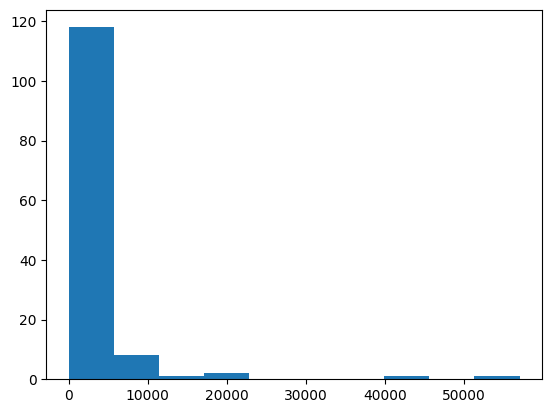

In [ ]:
plt.hist(df['Fecal_Streptococcus/Enterococcus_cfu/100ml'])
plt.show()

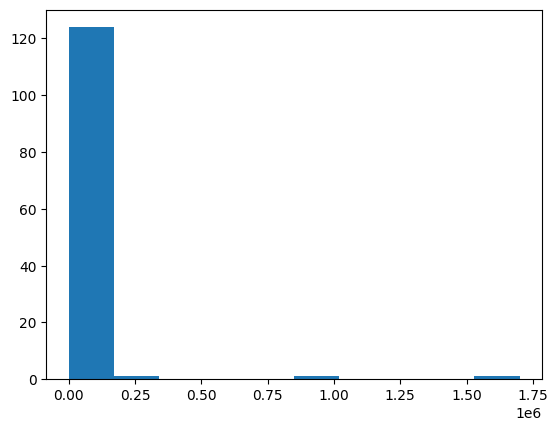

In [ ]:
plt.hist(df['Fecal_Coliform_cfu/100ml'])
plt.show()

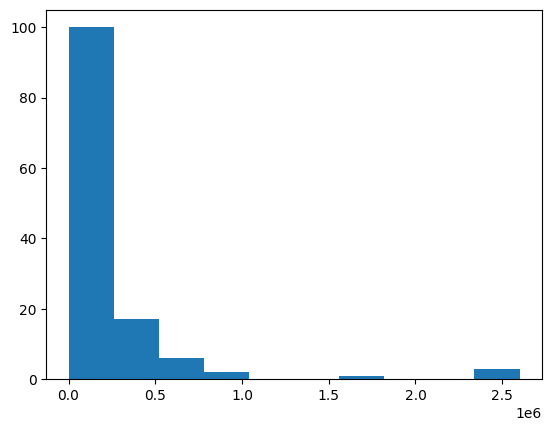

In [ ]:
plt.hist(df['Total_Bacterial_Count_cfu/ml'])
plt.show()

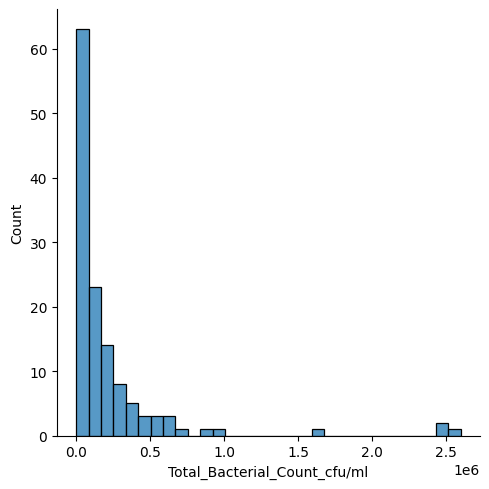

In [ ]:

sns.displot(df['Total_Bacterial_Count_cfu/ml'])

In [ ]:
df['PO4_(uMol/L)'].unique()
#'18/03/1900', '07/04/1900', '03/05/1900'


array(['3.33', '33.46', '18.46', '50.27', '83.43', '111.24', '184.58',
       '108.34', '14.72', '52.91', '7.91', '28.82', '29.80', '19.30',
       '35.50', '21.60', '103.50', '38.90', '90.40', '66.60', '71.40',
       '75.30', '53.90', '61.70', '48.70', '50.00', '46.90', '40.10',
       '30.40', '68.70', '32.90', '15.34', '38.91', '23.80', '18.83',
       '28.65', '43.42', '31.96', '23.99', '110.95', '39.08', '51.86',
       '49.14', '66.15', '44.00', '62.46', '52.44', '57.19', '31.02',
       '31.05', '39.18', '51.38', '31.42', '84.96', '41.90', '54.88', nan,
       '16.75', '7.63', '34.31', '12.02', '32.72', '31.84', '37.73',
       '80.85', '61.42', '27.08', '68.57', '25.03', '41.57', '15.43',
       '19.71', '7.97', '13.88', '0.33', '37.34', '19.06', '13.77',
       '34.81', '27.32', '36.13', '41.09', '30.84', '27.76', '17.29',
       '14.98', '52.40', '23.10', '64.60', '42.90', '47.10', '27.20',
       '12.70', '5.60', '3.80', '7.10', '6.70', '7.90', '14.50', '104.30',
       '78

In [ ]:
df['PO4_(uMol/L)'].replace(['18/03/1900', '07/04/1900', '03/05/1900'], None, inplace=True)

In [ ]:
#converts Type
#df['Fecal Coliform cfu/100ml'] = df['Fecal Coliform cfu/100ml'].astype(float)
df['PO4_(uMol/L)'] = df['PO4_(uMol/L)'].astype(float)
df['Extracted_Chlorophyll_(ug/L)'] = df['Extracted_Chlorophyll_(ug/L)'].astype(float)


In [ ]:
#convert the Month column to dummies variable
dummies = pd.get_dummies(df['Month'],  prefix='Month')
df = pd.concat([df,dummies,],axis=1)



In [ ]:
dummies_station = pd.get_dummies(df['Station'], drop_first=True)
df = pd.concat([df,dummies_station,],axis=1)

In [ ]:
dummies_season = pd.get_dummies(df['season'])
df = pd.concat([df, dummies_season ], axis = 1)

In [ ]:
df.head()

,Station,Date,HH:MM,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,A1,2014-01-04,16:20,0.14,22.16,0.69,442.0,163.37,8.31,18.3,...,0,0,0,0,0,0,0,0,0,1
1,A1,2014-06-26,12:09,0.10,29.35,0.97,301.0,127.14,1.71,3.7,...,0,0,0,0,0,0,0,1,0,0
2,A1,2014-08-27,11:44,0.20,29.15,0.96,182.0,76.55,1.71,128.8,...,1,0,0,0,0,0,0,0,1,0
3,A1,2014-12-23,13:05,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
4,A1,2015-02-25,11:08,0.20,15.45,0.73,184.0,59.48,0.09,3.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
##After adding the dummy varaible, drop the Month column
delete['Month'] = df['Month']
#df.drop(df['Month'],axis=1,inplace=True)

In [ ]:
##After adding the dummy varaible, drop the season column
delete['season'] = df['season']
df.drop(['season'], axis = 1, inplace = True)

In [ ]:
##After adding the dummy varaible, drop the Station column
delete['Station'] = df['Station']
df.drop(['Station'], axis = 1, inplace = True)

In [ ]:
delete['seven_days_ago'] = df['seven_days_ago']
delete['Date'] = df['Date']
delete['HH:MM'] = df['HH:MM']
df.drop(['seven_days_ago', 'Date', 'HH:MM'], axis = 1, inplace = True)

In [ ]:
df.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,163.37,8.31,18.3,32.97,3.13,11.75,...,0,0,0,0,0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,127.14,1.71,3.7,268.30,4.83,19.05,...,0,0,0,0,0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,76.55,1.71,128.8,427.18,18.63,127.00,...,1,0,0,0,0,0,0,0,1,0
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN,9.56,19.55,34.50,...,0,0,0,0,1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,59.48,0.09,3.0,9.96,12.03,23.20,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'DO%',
       'OBS_(NTU)', 'Chl_Fluo_(AU)', 'Extracted_Chlorophyll_(ug/L)',
       'BOD_5_(mg/L)', 'TSS_(mg/L)', 'POM_(mg/L)', 'PIM_mg/L', 'PO4_(uMol/L)',
       'NH4_(uMol/L)', 'NO2_(uM/L)', 'NO3_(uMol/L)',
       'Fecal_Streptococcus/Enterococcus_cfu/100ml',
       'Fecal_Coliform_cfu/100ml', 'Total_Bacterial_Count_cfu/ml',
       'Secchi_(m)', 'clouds_(%)', 'Month', 'year', 'Holiday', 'Rain_Sum',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'A4', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 248
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Depth_(m)                                   130 non-null    float64
 1   Temp_(degC)                                 129 non-null    float64
 2   Salinity_(PSU)                              129 non-null    float64
 3   DO_(uM)                                     123 non-null    float64
 4   DO%                                         123 non-null    float64
 5   OBS_(NTU)                                   124 non-null    float64
 6   Chl_Fluo_(AU)                               106 non-null    float64
 7   Extracted_Chlorophyll_(ug/L)                124 non-null    float64
 8   BOD_5_(mg/L)                                126 non-null    float64
 9   TSS_(mg/L)                                  125 non-null    float64
 10  POM_(mg/L)    

In [ ]:
df.isnull().sum()*100/len(df)

Depth_(m)                                      0.763359
Temp_(degC)                                    1.526718
Salinity_(PSU)                                 1.526718
DO_(uM)                                        6.106870
DO%                                            6.106870
OBS_(NTU)                                      5.343511
Chl_Fluo_(AU)                                 19.083969
Extracted_Chlorophyll_(ug/L)                   5.343511
BOD_5_(mg/L)                                   3.816794
TSS_(mg/L)                                     4.580153
POM_(mg/L)                                     4.580153
PIM_mg/L                                       5.343511
PO4_(uMol/L)                                  12.977099
NH4_(uMol/L)                                  34.351145
NO2_(uM/L)                                     4.580153
NO3_(uMol/L)                                   5.343511
Fecal_Streptococcus/Enterococcus_cfu/100ml     0.000000
Fecal_Coliform_cfu/100ml                       3

In [ ]:
#NULL VALUES
df["Depth_(m)"].fillna(df['Depth_(m)'].median(), inplace = True)
df["Temp_(degC)"].fillna(df['Temp_(degC)'].median(), inplace = True)
df["Salinity_(PSU)"].fillna(df['Salinity_(PSU)'].median(), inplace = True)
df["DO_(uM)"].fillna(df['DO_(uM)'].median(), inplace = True)
df["DO%"].fillna(df['DO%'].median(), inplace = True)
df["OBS_(NTU)"].fillna(df['OBS_(NTU)'].median(), inplace = True)
df["Extracted_Chlorophyll_(ug/L)"].fillna(df['Extracted_Chlorophyll_(ug/L)'].median(), inplace = True)
df["BOD_5_(mg/L)"].fillna(df['BOD_5_(mg/L)'].median(), inplace = True)
df["TSS_(mg/L)"].fillna(df['TSS_(mg/L)'].median(), inplace = True)
df["Chl_Fluo_(AU)"].fillna(df['Chl_Fluo_(AU)'].median(), inplace = True)
df["POM_(mg/L)"].fillna(df['POM_(mg/L)'].median(), inplace = True)
df["PIM_mg/L"].fillna(df['PIM_mg/L'].median(), inplace = True)
df["PO4_(uMol/L)"].fillna(df['PO4_(uMol/L)'].median(), inplace = True)
df["NH4_(uMol/L)"].fillna(df['NH4_(uMol/L)'].median(), inplace = True)
df["NO2_(uM/L)"].fillna(df['NO2_(uM/L)'].median(), inplace = True)
df["NO3_(uMol/L)"].fillna(df['NO3_(uMol/L)'].median(), inplace = True)
df["Secchi_(m)"].fillna(df['Secchi_(m)'].median(), inplace = True)
df['clouds_(%)'].fillna(df['clouds_(%)'].median(), inplace=True)


In [ ]:
df.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,163.37,8.31,18.300,32.97,3.13,11.75,...,0,0,0,0,0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,127.14,1.71,3.700,268.30,4.83,19.05,...,0,0,0,0,0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,76.55,1.71,128.800,427.18,18.63,127.00,...,1,0,0,0,0,0,0,0,1,0
3,0.20,22.04,1.03,152.1,57.04,33.28,24.165,9.56,19.55,34.50,...,0,0,0,0,1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,59.48,0.09,3.000,9.96,12.03,23.20,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(131, 42)

##Statistic Theory

In [ ]:
df.to_csv('datasetTest.csv')

In [ ]:
df['Fecal_Streptococcus/Enterococcus_cfu/100ml'] = np.log10(df['Fecal_Streptococcus/Enterococcus_cfu/100ml'])

<Axes: ylabel='Frequency'>

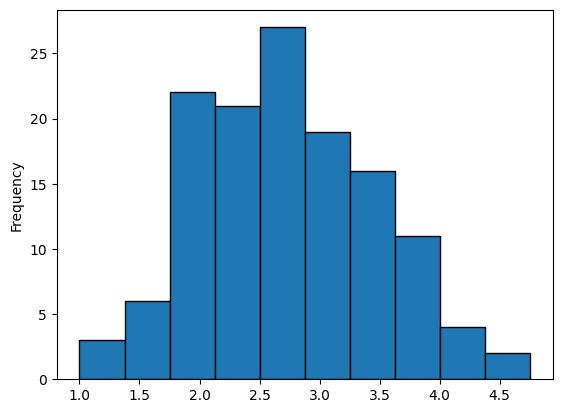

In [ ]:
df['Fecal_Streptococcus/Enterococcus_cfu/100ml'].plot(kind='hist', edgecolor='black')

In [ ]:
df['Fecal_Coliform_cfu/100ml'] = np.log10(df['Fecal_Coliform_cfu/100ml'])

<Axes: ylabel='Frequency'>

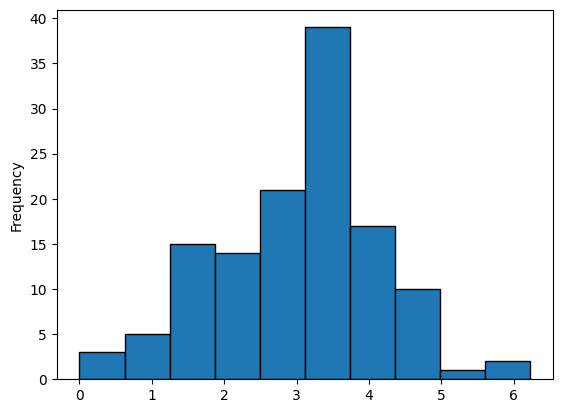

In [ ]:
df['Fecal_Coliform_cfu/100ml'].plot(kind='hist', edgecolor='black')

In [ ]:
df['Total_Bacterial_Count_cfu/ml'] = np.log10(df['Total_Bacterial_Count_cfu/ml'])

<Axes: ylabel='Frequency'>

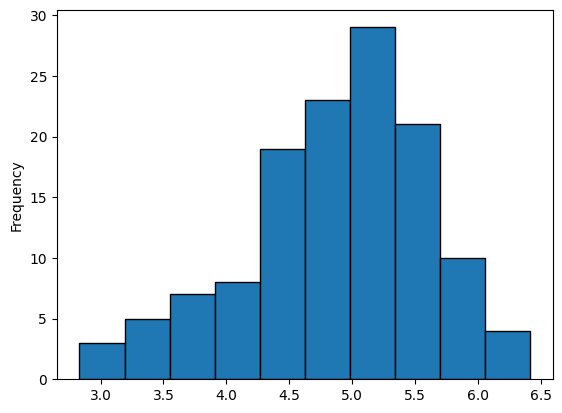

In [ ]:
df['Total_Bacterial_Count_cfu/ml'].plot(kind='hist', edgecolor='black')

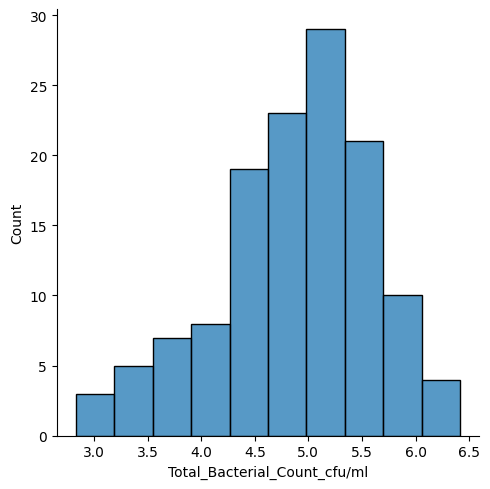

In [ ]:

sns.displot(df['Total_Bacterial_Count_cfu/ml'])

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the distribution using sns.displot()
# sns.displot(df['Total_Bacterial_Count_cfu/ml'])

# # Save the plot as an image file
# plt.savefig('plot.png')

# # Display the image using an image viewer or within a Jupyter Notebook
# # You can use different methods depending on your environment

# # Example: Displaying the image within a Jupyter Notebook
# from IPython.display import Image
# Image(filename='plot.png')


In [ ]:
df_features = df.drop(['Fecal_Streptococcus/Enterococcus_cfu/100ml','Total_Bacterial_Count_cfu/ml','Fecal_Coliform_cfu/100ml'],axis = 1)

In [ ]:
# Iterate over all columns in the DataFrame
for col in df_features.columns:
    Q1 = df_features[col].quantile(0.25)
    Q3 = df_features[col].quantile(0.75)
    IQR = Q3 - Q1

    LB = Q1-(1.5*IQR)
    UB = Q3+(1.5*IQR)

    # Replace values lower than LB with LB
    df_features.loc[df_features[col] < LB, col] = LB

    # Replace values higher than UB with UB
    df_features.loc[df_features[col] > UB, col] = UB



In [ ]:
df_features

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),DO%,OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.6900,411.6025,160.98,8.31,18.300,32.97,3.13,11.75,...,0,0,0,0,0,0.0,0,0,0,1.0
1,0.10,29.35,0.9700,301.0000,127.14,1.71,3.700,268.30,4.83,19.05,...,0,0,0,0,0,0.0,0,0,0,0.0
2,0.20,29.15,0.9600,182.0000,76.55,1.71,128.800,277.16,18.63,127.00,...,0,0,0,0,0,0.0,0,0,0,0.0
3,0.20,22.04,1.0300,152.1000,57.04,33.28,24.165,9.56,19.55,34.50,...,0,0,0,0,0,0.0,0,0,0,0.0
4,0.20,15.45,0.7300,184.0000,59.48,0.09,3.000,9.96,12.03,23.20,...,0,0,0,0,0,0.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.45,18.38,14.0375,248.5200,94.48,101.03,24.165,88.39,16.05,82.40,...,0,0,0,0,0,1.0,0,0,0,1.0
243,0.20,17.53,2.6600,81.4300,27.72,103.74,29.600,74.20,45.50,155.25,...,0,0,0,0,0,1.0,0,0,0,1.0
244,0.20,22.04,0.8600,120.4500,44.38,103.85,13.540,46.02,44.48,73.70,...,0,0,0,0,0,0.0,0,0,0,0.0
246,0.20,23.60,2.7900,148.6300,57.04,41.75,19.920,80.12,45.30,33.73,...,0,0,0,0,0,1.0,0,0,0,0.0


In [ ]:
corr_df=df.corr()

In [ ]:
cols = corr_df.columns.to_list()
for i in range(len(cols)):
  print(cols[i], ': ', end=' ')
  for j in range(len(cols)):
    if abs(corr_df.iloc[i,j]) >= 0.95 and cols[i] is not cols[j] :
      print(cols[j], end=', ')
  print()

Depth_(m) :  
Temp_(degC) :  
Salinity_(PSU) :  
DO_(uM) :  DO%, 
DO% :  DO_(uM), 
OBS_(NTU) :  
Chl_Fluo_(AU) :  
Extracted_Chlorophyll_(ug/L) :  
BOD_5_(mg/L) :  
TSS_(mg/L) :  PIM_mg/L, 
POM_(mg/L) :  
PIM_mg/L :  TSS_(mg/L), 
PO4_(uMol/L) :  
NH4_(uMol/L) :  
NO2_(uM/L) :  
NO3_(uMol/L) :  
Fecal_Streptococcus/Enterococcus_cfu/100ml :  
Fecal_Coliform_cfu/100ml :  
Total_Bacterial_Count_cfu/ml :  
Secchi_(m) :  
clouds_(%) :  
Month :  
year :  
Holiday :  
Rain_Sum :  
Month_1 :  
Month_2 :  
Month_3 :  
Month_4 :  
Month_5 :  
Month_6 :  
Month_7 :  
Month_8 :  
Month_9 :  
Month_10 :  
Month_11 :  
Month_12 :  
A4 :  
Fall :  
Spring :  
Summer :  
Winter :  


In [ ]:
#delete column with above of 95% correlation
delete['DO%'] = df['DO%']
delete['PIM_mg/L'] = df['PIM_mg/L']
df.drop(['PIM_mg/L','DO%'], axis = 1, inplace = True)

In [ ]:
delete['Month'] = df['Month']
df.drop(['Month'], axis = 1, inplace = True)

In [ ]:
T = df[['Fecal_Streptococcus/Enterococcus_cfu/100ml','Total_Bacterial_Count_cfu/ml','Fecal_Coliform_cfu/100ml']]

In [ ]:
df.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,8.31,18.300,32.97,3.13,11.75,10.0,...,0,0,0,0,0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,1.71,3.700,268.30,4.83,19.05,21.0,...,0,0,0,0,0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,1.71,128.800,427.18,18.63,127.00,65.0,...,1,0,0,0,0,0,0,0,1,0
3,0.20,22.04,1.03,152.1,33.28,24.165,9.56,19.55,34.50,15.0,...,0,0,0,0,1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,0.09,3.000,9.96,12.03,23.20,14.8,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
corr_df=df.corr()
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df,
    x=corr_df.columns,
    y=corr_df.columns,
    zmax=1,
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

In [ ]:
 pd.crosstab(index=df_features.A4, columns='Count', normalize=False, margins=True)

col_0,Count,All
A4,,
0.0,73,73
1.0,58,58
All,131,131


In [ ]:
import scipy.stats as stats

In [ ]:
df_without_target = df.drop(['Fecal_Streptococcus/Enterococcus_cfu/100ml','Total_Bacterial_Count_cfu/ml','Fecal_Coliform_cfu/100ml'],axis = 1)
df_target_1 = df[['Fecal_Streptococcus/Enterococcus_cfu/100ml']]

In [ ]:
df_boxplot=df[['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'Extracted_Chlorophyll_(ug/L)', 'BOD_5_(mg/L)',
       'TSS_(mg/L)', 'POM_(mg/L)', 'PO4_(uMol/L)', 'NH4_(uMol/L)',
       'NO2_(uM/L)', 'NO3_(uMol/L)',
       'Secchi_(m)', 'clouds_(%)',  'Rain_Sum',]]

In [ ]:
df_boxplot_a = df[['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)','BOD_5_(mg/L)',
        'POM_(mg/L)', 'PO4_(uMol/L)','Secchi_(m)', 'clouds_(%)',  'Rain_Sum']]

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(df_boxplot_a.columns))] # לייןספייס-מרחב ליניארי,נותן טווח ומחלק את זה במספר העמודות,לצבעים של הבוקס פלוט
fig = go.Figure()
fig.add_traces(data=[go.Box(
    y=df_boxplot_a.iloc[:, i],
    marker_color=c[i],
    name=df_boxplot_a.columns[i])
    for i in range(len(df_boxplot_a.columns))
    ])


In [ ]:
df_boxplot_b = df[['DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'Extracted_Chlorophyll_(ug/L)','NO2_(uM/L)', 'NO3_(uMol/L)','TSS_(mg/L)']]

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(df_boxplot_b.columns))] # לייןספייס-מרחב ליניארי,נותן טווח ומחלק את זה במספר העמודות,לצבעים של הבוקס פלוט
fig = go.Figure()
fig.add_traces(data=[go.Box(
    y=df_boxplot_b.iloc[:, i],
    marker_color=c[i],
    name=df_boxplot_b.columns[i])
    for i in range(len(df_boxplot_b.columns))
    ])


In [ ]:


c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(df_boxplot_b.columns))] # לייןספייס-מרחב ליניארי,נותן טווח ומחלק את זה במספר העמודות,לצבעים של הבוקס פלוט
fig = go.Figure()
fig.add_traces(data=[go.Box(
    y=df['NH4_(uMol/L)'],
    name= 'NH4_(uMol/L)'
    )

    ])

In [ ]:
for col in df_boxplot.columns:
    Q1 = df_boxplot[col].quantile(0.25)
    Q3 = df_boxplot[col].quantile(0.75)
    IQR = Q3 - Q1

    LB = Q1-(1.5*IQR)
    UB = Q3+(1.5*IQR)

    # Replace values lower than LB with LB
    df_boxplot.loc[df_boxplot[col] < LB, col] = LB

    # Replace values higher than UB with UB
    df_boxplot.loc[df_boxplot[col] > UB, col] = UB

<ipython-input-872-2d2bdeb1aafb>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-872-2d2bdeb1aafb>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-872-2d2bdeb1aafb>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-872-2d2bdeb1aafb>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(df_boxplot.columns))] # לייןספייס-מרחב ליניארי,נותן טווח ומחלק את זה במספר העמודות,לצבעים של הבוקס פלוט
fig = go.Figure()
fig.add_traces(data=[go.Box(
    y=df_boxplot.iloc[:, i],
    marker_color=c[i],
    name=df_boxplot.columns[i])
    for i in range(len(df_boxplot.columns))
    ])


In [ ]:


def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(20,10))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                      vmax=1, annot=True, cmap="YlGnBu") # Change the color palette to YlGnBu
    plt.title("Pearson Correlation")
    return r

In [ ]:
df_corr=df[['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'Extracted_Chlorophyll_(ug/L)', 'BOD_5_(mg/L)',
       'TSS_(mg/L)', 'POM_(mg/L)', 'PO4_(uMol/L)', 'NH4_(uMol/L)',
       'NO2_(uM/L)', 'NO3_(uMol/L)',
       'Secchi_(m)', 'clouds_(%)',  'Rain_Sum','Fecal_Streptococcus/Enterococcus_cfu/100ml',
       'Fecal_Coliform_cfu/100ml', 'Total_Bacterial_Count_cfu/ml',]]

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),PO4_(uMol/L),NH4_(uMol/L),NO2_(uM/L),NO3_(uMol/L),Secchi_(m),clouds_(%),Rain_Sum,Fecal_Streptococcus/Enterococcus_cfu/100ml,Fecal_Coliform_cfu/100ml,Total_Bacterial_Count_cfu/ml
Depth_(m),1.000000,-0.146420,0.185536,0.106173,0.148703,-0.086820,-0.077821,-0.048506,0.048866,-0.038572,-0.089915,0.042431,-0.101064,-0.058790,-0.069462,-0.026450,0.007172,0.112131,0.095676,0.101521
Temp_(degC),-0.146420,1.000000,0.064068,-0.221616,-0.086088,0.338748,0.283645,-0.043116,-0.090127,0.098680,0.351575,-0.214222,0.199743,-0.464135,-0.091793,-0.095047,-0.546577,-0.258777,-0.479940,-0.370638
Salinity_(PSU),0.185536,0.064068,1.000000,0.219082,-0.247318,0.043507,-0.089476,-0.245687,-0.096188,-0.150104,-0.234483,-0.189036,-0.131759,-0.063482,0.133938,-0.078223,-0.076807,-0.435460,-0.304275,-0.338438
DO_(uM),0.106173,-0.221616,0.219082,1.000000,-0.115040,-0.099986,-0.153777,-0.294043,-0.113347,-0.209833,-0.184023,-0.090036,-0.139584,0.137406,-0.008827,-0.045541,0.011054,-0.294909,-0.145388,-0.265463
OBS_(NTU),0.148703,-0.086088,-0.247318,-0.115040,1.000000,-0.062018,0.058267,0.338664,0.282750,0.153156,0.077329,0.019721,0.022936,-0.074691,0.132486,0.087587,0.226925,0.180197,0.272165,0.275224
Chl_Fluo_(AU),-0.086820,0.338748,0.043507,-0.099986,-0.062018,1.000000,0.519596,0.261088,-0.022277,0.058747,0.020732,0.051643,0.085029,-0.086848,-0.192741,0.083011,-0.146918,-0.103036,-0.147241,-0.063340
Extracted_Chlorophyll_(ug/L),-0.077821,0.283645,-0.089476,-0.153777,0.058267,0.519596,1.000000,0.184121,-0.013611,0.142489,0.047012,-0.041034,0.131214,-0.029484,-0.064782,0.213558,-0.056170,0.055124,-0.033452,0.118192
BOD_5_(mg/L),-0.048506,-0.043116,-0.245687,-0.294043,0.338664,0.261088,0.184121,1.000000,0.281999,0.304436,0.135134,0.353268,0.183495,-0.160623,0.046093,0.212949,0.085033,0.178118,0.222552,0.372866
TSS_(mg/L),0.048866,-0.090127,-0.096188,-0.113347,0.282750,-0.022277,-0.013611,0.281999,1.000000,0.263440,-0.037077,0.044434,-0.028567,0.090206,-0.004982,-0.027788,0.147201,0.194721,0.165127,0.204321
POM_(mg/L),-0.038572,0.098680,-0.150104,-0.209833,0.153156,0.058747,0.142489,0.304436,0.263440,1.000000,0.080815,0.222903,0.021933,-0.271496,-0.150926,0.025639,-0.223326,0.196697,0.078358,0.174999


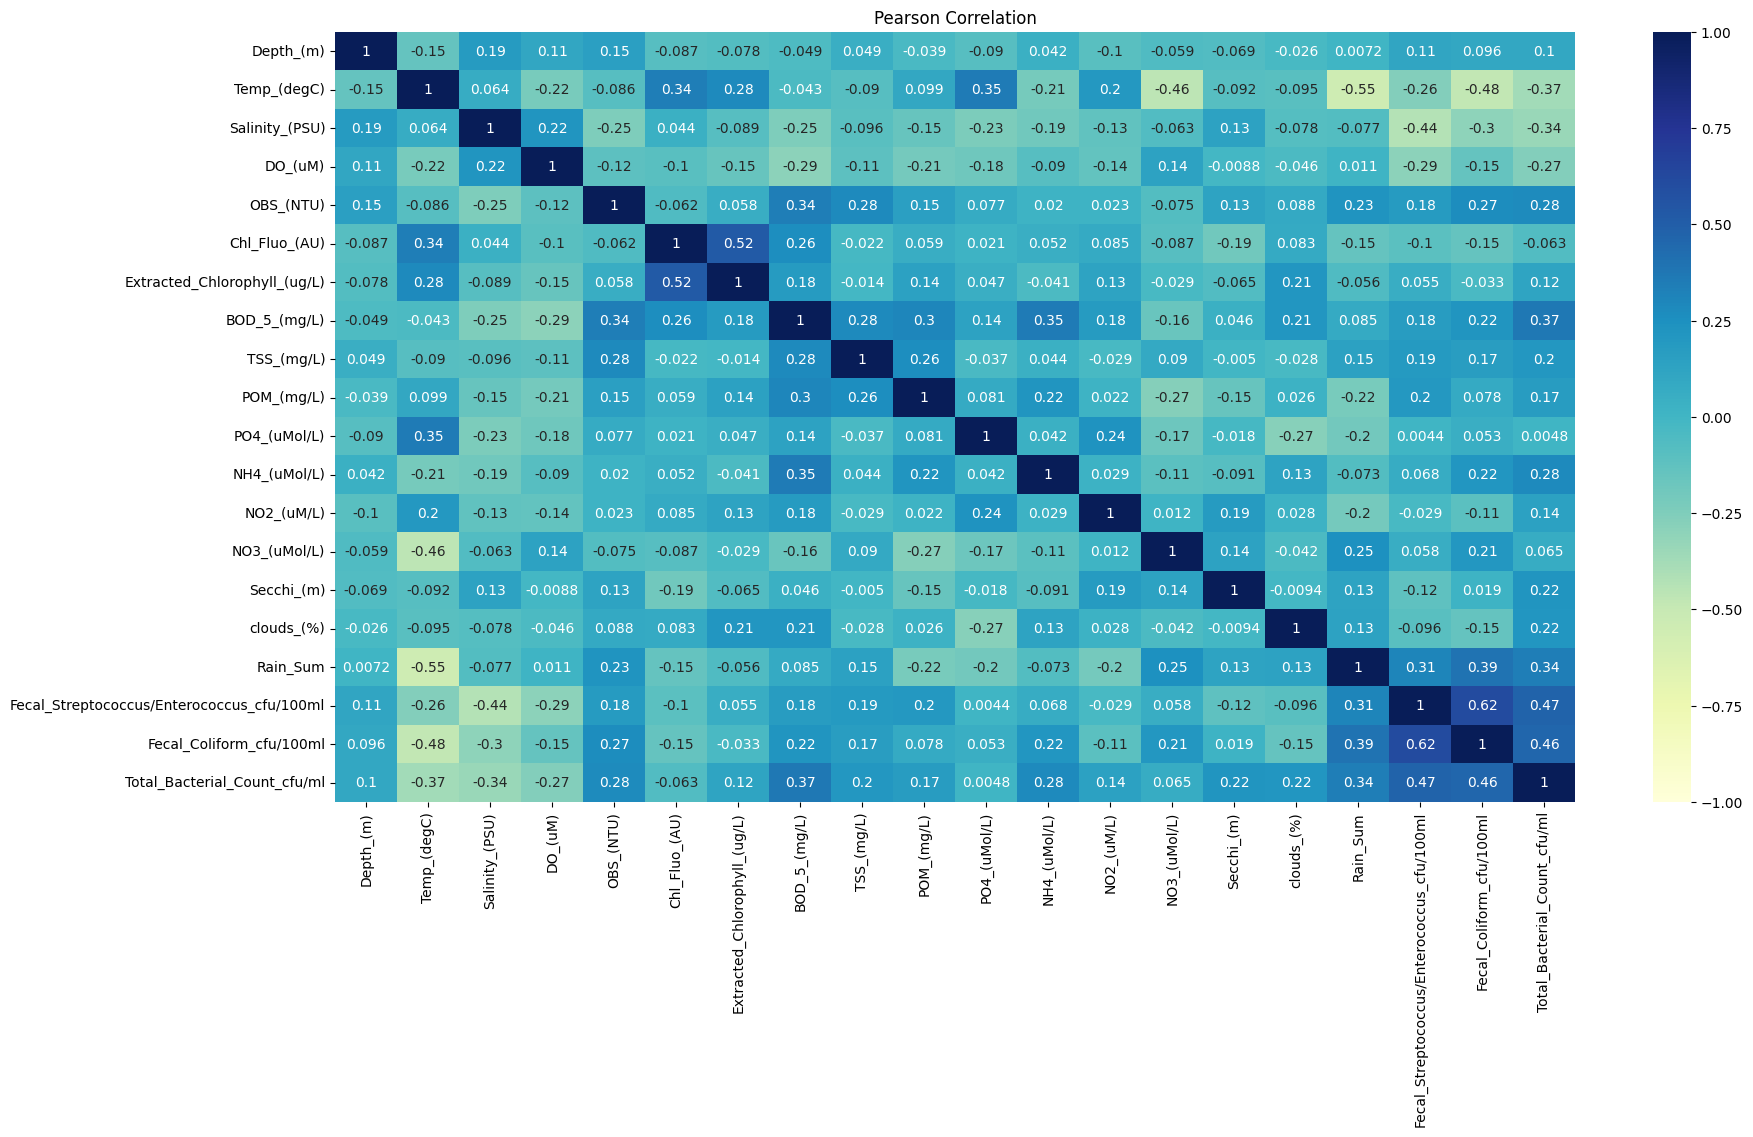

In [ ]:
display_correlation(df_corr)

In [ ]:
high_corr = corr_df['Total_Bacterial_Count_cfu/ml'].iloc[0:-1].sort_values(ascending=False)
high_corr

Total_Bacterial_Count_cfu/ml                  1.000000
Fecal_Streptococcus/Enterococcus_cfu/100ml    0.472161
Fecal_Coliform_cfu/100ml                      0.457223
BOD_5_(mg/L)                                  0.372866
Rain_Sum                                      0.339816
NH4_(uMol/L)                                  0.283852
year                                          0.278483
OBS_(NTU)                                     0.275224
Secchi_(m)                                    0.224741
clouds_(%)                                    0.218177
TSS_(mg/L)                                    0.204321
POM_(mg/L)                                    0.174999
Month_4                                       0.159619
Month_11                                      0.156940
Month_2                                       0.152035
NO2_(uM/L)                                    0.144619
Fall                                          0.135708
Extracted_Chlorophyll_(ug/L)                  0.118192
Depth_(m) 

In [ ]:
high_corr_df = pd.DataFrame({'high_corr_to_target':high_corr}, index=high_corr.index)
high_corr_df

,high_corr_to_target
Total_Bacterial_Count_cfu/ml,1.000000
Fecal_Streptococcus/Enterococcus_cfu/100ml,0.472161
Fecal_Coliform_cfu/100ml,0.457223
BOD_5_(mg/L),0.372866
Rain_Sum,0.339816
NH4_(uMol/L),0.283852
year,0.278483
OBS_(NTU),0.275224
Secchi_(m),0.224741
clouds_(%),0.218177


In [ ]:
#df - Full
#df_features - without target column
#df_target_1 = 'Fecal_Streptococcus/Enterococcus_cfu/100ml'
#X - only categorial features

# **Statistic Tests**

# **T-Tests**

In [ ]:
from scipy.stats import ttest_ind

#T-test Station column
group1 = df[df['A4']==1.0]
group2 = df[df['A4']==0.0]

#perform Welch's t-test
f_value, p_value = ttest_ind(group1['Fecal_Streptococcus/Enterococcus_cfu/100ml'], group2['Fecal_Streptococcus/Enterococcus_cfu/100ml'])#, equal_var=False)


A1 = group2['Fecal_Streptococcus/Enterococcus_cfu/100ml'].mean()
A4 = group1['Fecal_Streptococcus/Enterococcus_cfu/100ml'].mean()

print('f value: ',f_value)
print('p value: ',p_value)
print('Group1 A4 mean: ',A4)
print('Group2 A1 mean: ',A1)


f value:  -6.10626153158889
p value:  1.1153796382140725e-08
Group1 A4 mean:  2.345693098281607
Group2 A1 mean:  3.0458208073202058


In [ ]:
A1_Salinity = group2['Salinity_(PSU)'].mean()
A4_Salinity = group1['Salinity_(PSU)'].mean()

In [ ]:
from scipy.stats import ttest_ind

#T-test Station column
group1 = df[df['A4']==1.0]
group2 = df[df['A4']==0.0]

#perform Welch's t-test
f_value, p_value = ttest_ind(group1['Salinity_(PSU)'], group2['Salinity_(PSU)'])#, equal_var=False)


print('f value: ',f_value)
print('p value: ',p_value)
print('Group1 A4 mean: ',A4_Salinity)
print('Group2 A1 mean: ',A1_Salinity)


f value:  9.989103203056823
p value:  9.377906394067304e-18
Group1 A4 mean:  8.041034482758622
Group2 A1 mean:  0.8702739726027398


In [ ]:
print('a: ' ,A1_Salinity)
print('b: ', A4_Salinity)

a:  0.8702739726027398
b:  8.041034482758622


In [ ]:
#T-test Station column
group1 = df[df['A4']==1.0]
group2 = df[df['A4']==0.0]

#perform Welch's t-test
f_value, p_value = ttest_ind(group1['Fecal_Streptococcus/Enterococcus_cfu/100ml'], group2['Fecal_Streptococcus/Enterococcus_cfu/100ml'])#, equal_var=False)


A1 = group2['Fecal_Streptococcus/Enterococcus_cfu/100ml'].mean()
A4 = group1['Fecal_Streptococcus/Enterococcus_cfu/100ml'].mean()

print('f value: ',f_value)
print('p value: ',p_value)
print('Group1 A4 mean: ',A4)
print('Group2 A1 mean: ',A1)

f value:  -6.10626153158889
p value:  1.1153796382140725e-08
Group1 A4 mean:  2.345693098281607
Group2 A1 mean:  3.0458208073202058


In [ ]:
#T-test Station column
group1 = df[df['A4']==1.0]
group2 = df[df['A4']==0.0]

#perform Welch's t-test
f_value, p_value = ttest_ind(group1['Fecal_Coliform_cfu/100ml'], group2['Fecal_Coliform_cfu/100ml'])#, equal_var=False)


A1 = group2['Fecal_Coliform_cfu/100ml'].mean()
A4 = group1['Fecal_Coliform_cfu/100ml'].mean()

print('f value: ',f_value)
print('p value: ',p_value)
print('Group1 A4 mean: ',A4)
print('Group2 A1 mean: ',A1)

f value:  nan
p value:  nan
Group1 A4 mean:  2.5605929701801657
Group2 A1 mean:  3.369059382439105


In [ ]:
#T-test Station column
group1 = df[df['A4']==1.0]
group2 = df[df['A4']==0.0]

#perform Welch's t-test
f_value, p_value = ttest_ind(group1['Total_Bacterial_Count_cfu/ml'], group2['Total_Bacterial_Count_cfu/ml'])#, equal_var=False)


A1 = group2['Total_Bacterial_Count_cfu/ml'].mean()
A4 = group1['Total_Bacterial_Count_cfu/ml'].mean()

print('f value: ',f_value)
print('p value: ',p_value)
print('Group1 A4 mean: ',A4)
print('Group2 A1 mean: ',A1)

f value:  nan
p value:  nan
Group1 A4 mean:  4.7061186966921875
Group2 A1 mean:  4.990853391735578


In [ ]:
#Fecal_Streptococcus/Enterococcus_cfu/100ml       3.045821 -- group 2 Enterance to the Astoar

#Fecal_Streptococcus/Enterococcus_cfu/100ml       2.345693 -- group 1 out from the Astoar

#**Anova Test**

In [ ]:
# Perform the ANOVA test
f_value, p_value = stats.f_oneway(df[df['Winter']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Spring']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Summer']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Fall']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'])

# Print the results
print("F-value = ", f_value)
print("P-value = ", p_value)

F-value =  1.3673243361126644
P-value =  0.2558060221710881


In [ ]:
f_value, p_value = stats.f_oneway(df[df['Month_1']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_2']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_3']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_4']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_5']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_6']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_7']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_8']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_9']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_10']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_11']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'],
                                  df[df['Month_12']==1.0]['Fecal_Streptococcus/Enterococcus_cfu/100ml'])

In [ ]:
print("F-value = ", f_value)
print("P-value = ", p_value)

F-value =  1.0236025714362804
P-value =  0.43008023327528033


In [ ]:
df.to_excel("output.xlsx")

**Features Importances**

In [ ]:
df_target3 = df[["Total_Bacterial_Count_cfu/ml"]]

In [ ]:
#  from xgboost import XGBClassifier
#  model = XGBClassifier()
#  model.fit(df_without_target,df_target3)
#  xgb_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=df_without_target.columns)
#  xgb_importances_df = xgb_importances_df.sort_values(by='feature_importance', ascending=False)
#  xgb_importances_df

In [ ]:
X = df[['Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'A4', 'Fall',
       'Spring', 'Summer', 'Winter','Fecal_Streptococcus/Enterococcus_cfu/100ml',
       'Fecal_Coliform_cfu/100ml', 'Total_Bacterial_Count_cfu/ml']]

In [ ]:
# from sklearn.feature_selection import SelectKBest , chi2, f_classif
# anova_selector = SelectKBest(f_classif, k=len(X.columns))
# anova_selector.fit(X, df_target_1)

# anova_scores = pd.Series(anova_selector.scores_.tolist())
# anova_p_values = pd.Series(anova_selector.pvalues_.tolist())

# anova_selected_df = pd.DataFrame({'univariate_score':anova_scores, 'p_values':anova_p_values})
# anova_selected_df.set_index(X.columns, inplace=True, drop=True)
# anova_selector_df = anova_selected_df.sort_values(by='univariate_score', ascending=False)
# anova_selector_df
# #

In [ ]:
# cols = corr_df.columns.to_list()
# for i in range(len(cols)):
#   print(cols[i], ': ', end=' ')
#   for j in range(len(cols)):
#     if abs(corr_df.iloc[i,j]) >= 0.4 and cols[i] is not cols[j] :
#       print(cols[j], end=', ')
#   print()

In [ ]:
df_corr_Fecal_Coliform_cfu = df[['Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)','A4',
        'Rain_Sum','Fecal_Streptococcus/Enterococcus_cfu/100ml']]

,Temp_(degC),Salinity_(PSU),DO_(uM),A4,Rain_Sum,Fecal_Streptococcus/Enterococcus_cfu/100ml
Temp_(degC),1.000000,0.064068,-0.221616,0.051755,-0.546577,-0.258777
Salinity_(PSU),0.064068,1.000000,0.219082,0.660413,-0.076807,-0.435460
DO_(uM),-0.221616,0.219082,1.000000,0.285587,0.011054,-0.294909
A4,0.051755,0.660413,0.285587,1.000000,0.015461,-0.473529
Rain_Sum,-0.546577,-0.076807,0.011054,0.015461,1.000000,0.311883
Fecal_Streptococcus/Enterococcus_cfu/100ml,-0.258777,-0.435460,-0.294909,-0.473529,0.311883,1.000000


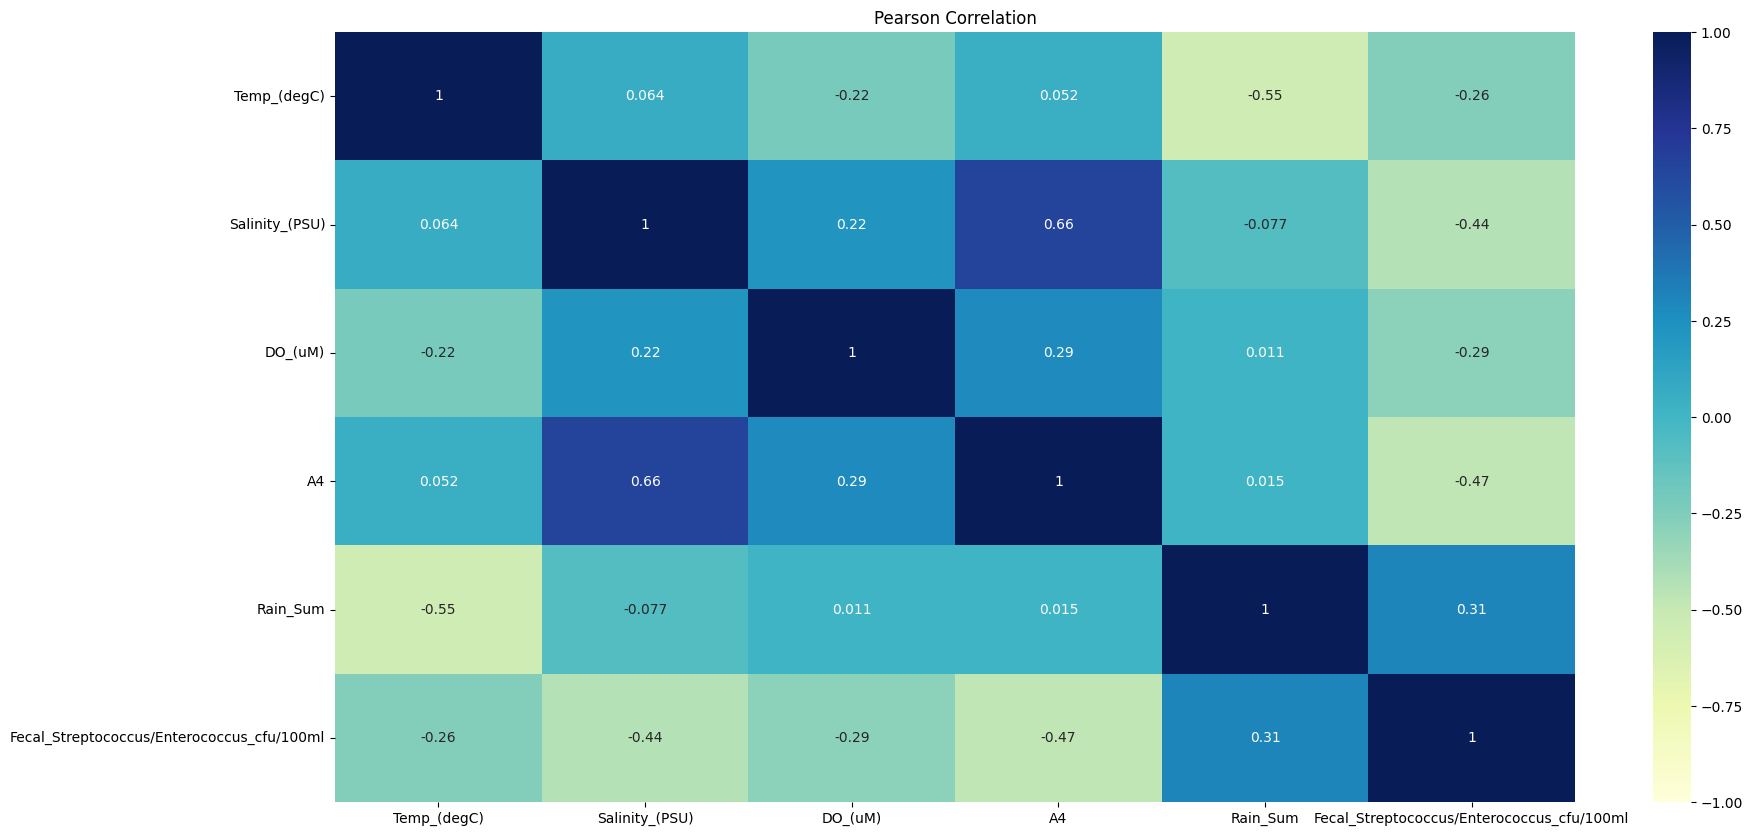

In [ ]:
display_correlation(df_corr_Fecal_Coliform_cfu)

In [ ]:
df_corr_Fecal_Coliform_cfu =  df[['Temp_(degC)', 'Salinity_(PSU)','OBS_(NTU)',
        'Rain_Sum','Fecal_Coliform_cfu/100ml']]

,Temp_(degC),Salinity_(PSU),OBS_(NTU),Rain_Sum,Fecal_Coliform_cfu/100ml
Temp_(degC),1.000000,0.064068,-0.086088,-0.546577,-0.479940
Salinity_(PSU),0.064068,1.000000,-0.247318,-0.076807,-0.304275
OBS_(NTU),-0.086088,-0.247318,1.000000,0.226925,0.272165
Rain_Sum,-0.546577,-0.076807,0.226925,1.000000,0.392395
Fecal_Coliform_cfu/100ml,-0.479940,-0.304275,0.272165,0.392395,1.000000


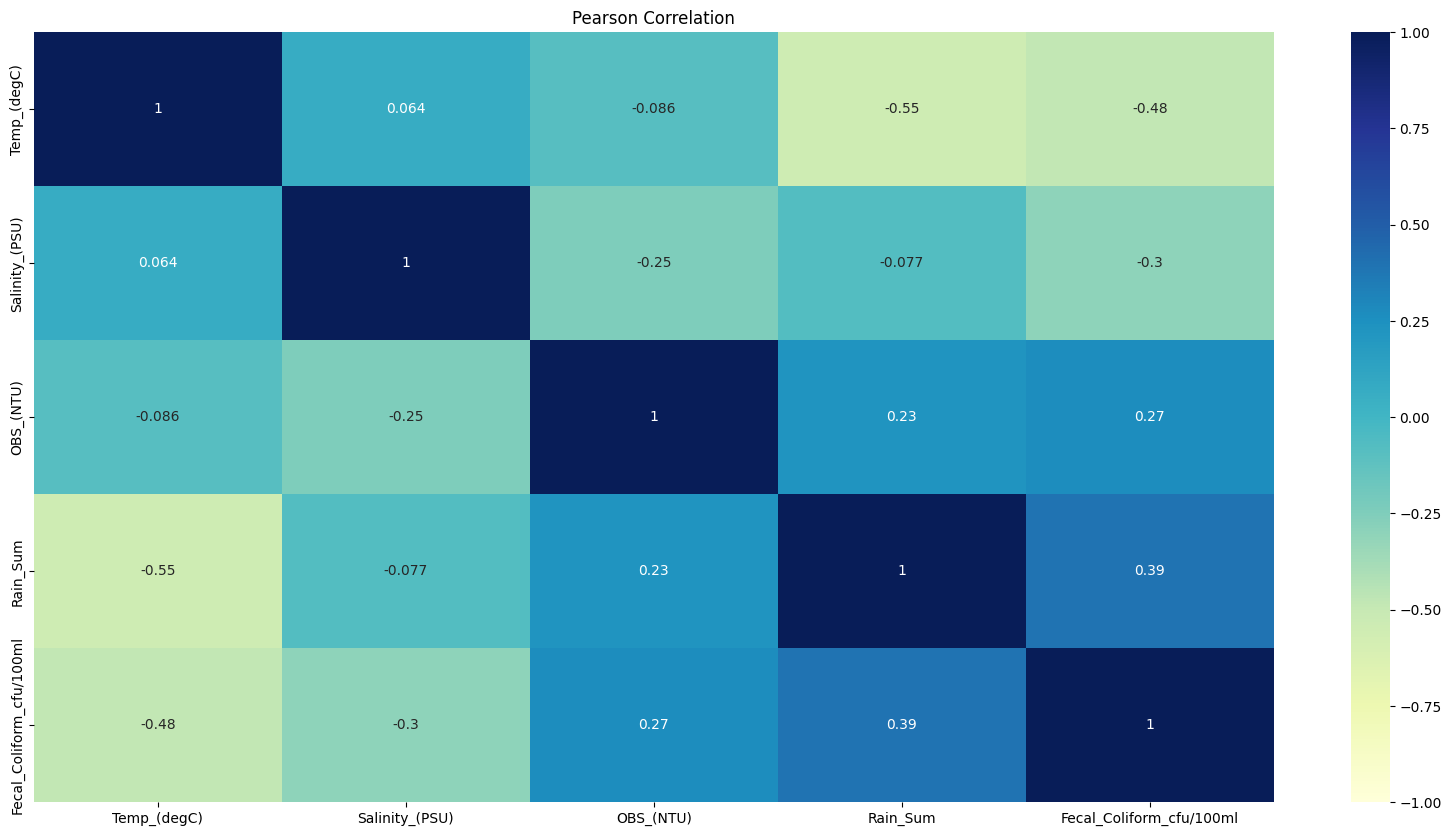

In [ ]:
display_correlation(df_corr_Fecal_Coliform_cfu)

In [ ]:


df_corr_Total_Bacterial_Count_cfu =  df[['Temp_(degC)', 'Salinity_(PSU)','OBS_(NTU)','BOD_5_(mg/L)',
        'Rain_Sum','Total_Bacterial_Count_cfu/ml']]

,Temp_(degC),Salinity_(PSU),OBS_(NTU),BOD_5_(mg/L),Rain_Sum,Total_Bacterial_Count_cfu/ml
Temp_(degC),1.000000,0.064068,-0.086088,-0.043116,-0.546577,-0.370638
Salinity_(PSU),0.064068,1.000000,-0.247318,-0.245687,-0.076807,-0.338438
OBS_(NTU),-0.086088,-0.247318,1.000000,0.338664,0.226925,0.275224
BOD_5_(mg/L),-0.043116,-0.245687,0.338664,1.000000,0.085033,0.372866
Rain_Sum,-0.546577,-0.076807,0.226925,0.085033,1.000000,0.339816
Total_Bacterial_Count_cfu/ml,-0.370638,-0.338438,0.275224,0.372866,0.339816,1.000000


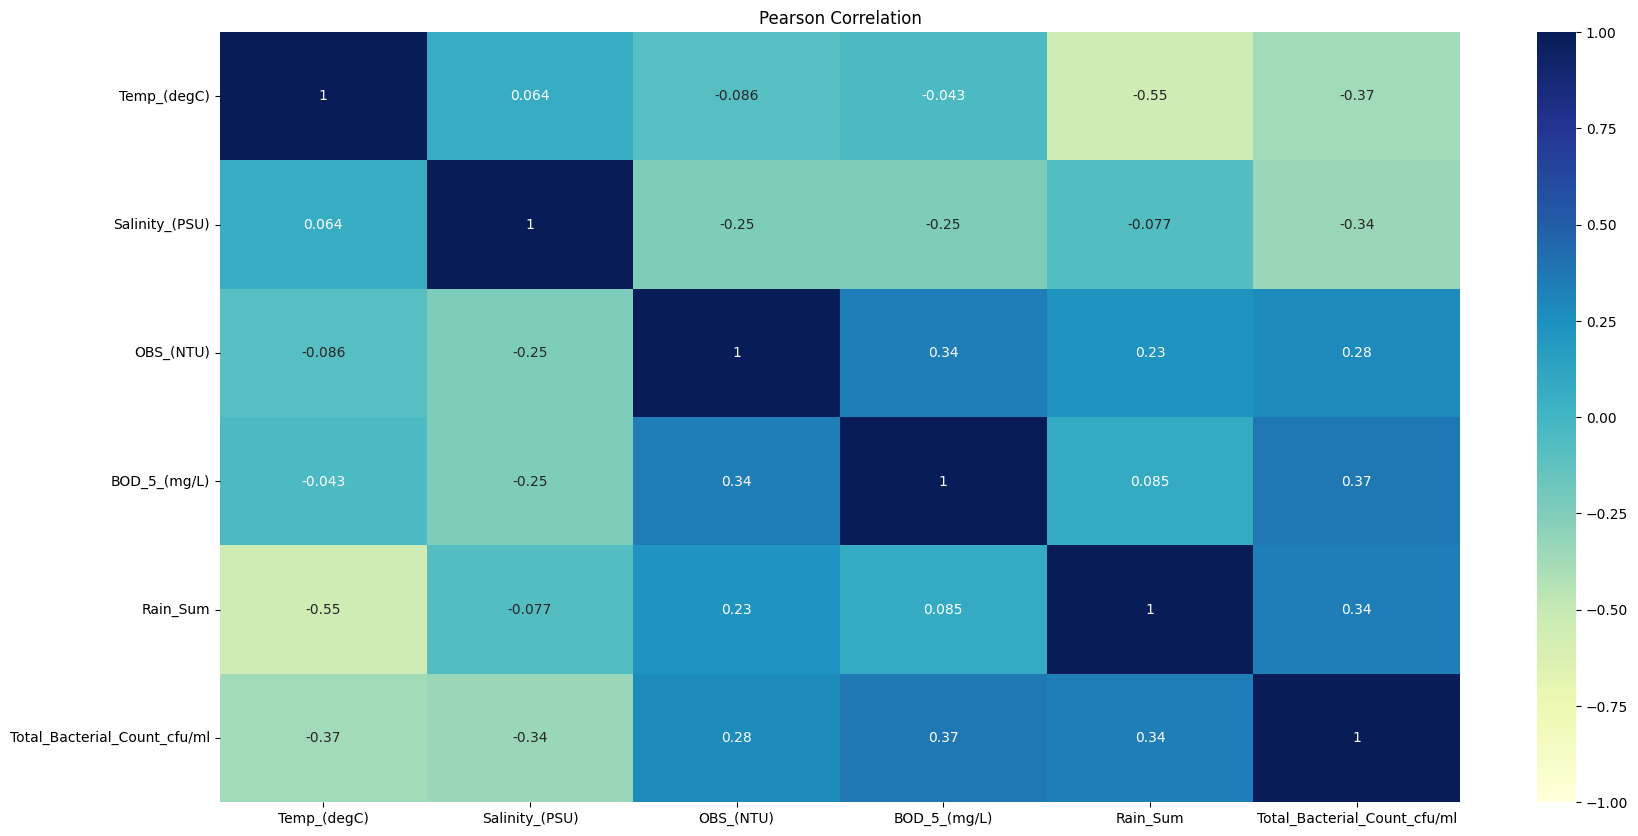

In [ ]:
display_correlation(df_corr_Total_Bacterial_Count_cfu)

In [ ]:
def display_correlation_spear(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(20,10))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                      vmax=1, annot=True, cmap="YlGnBu") # Change the color palette to YlGnBu
    plt.title("Spearman Correlation")
    return r

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter,Fecal_Streptococcus/Enterococcus_cfu/100ml,Fecal_Coliform_cfu/100ml,Total_Bacterial_Count_cfu/ml
Month_1,1.000000,-0.111014,-0.138864,-0.111014,-0.116917,-0.116917,-0.104885,-0.116917,-0.084604,-0.116917,-0.111014,-0.111014,-0.024088,-0.215007,-0.219548,-0.192160,0.562137,-0.030938,0.083901,0.138667
Month_2,-0.111014,1.000000,-0.103377,-0.082645,-0.087039,-0.087039,-0.078082,-0.087039,-0.062984,-0.087039,-0.082645,-0.082645,-0.024741,-0.160062,-0.163442,-0.143054,0.418483,0.199573,0.104637,0.163112
Month_3,-0.138864,-0.103377,1.000000,-0.103377,-0.108874,-0.108874,-0.097669,-0.108874,-0.078784,-0.108874,-0.103377,-0.103377,0.017316,-0.200215,-0.204444,-0.178941,0.523464,-0.050720,0.037937,0.047088
Month_4,-0.111014,-0.082645,-0.103377,1.000000,-0.087039,-0.087039,-0.078082,-0.087039,-0.062984,-0.087039,-0.082645,-0.082645,0.033135,-0.160062,0.505650,-0.143054,-0.197486,-0.063864,-0.041073,0.177905
Month_5,-0.116917,-0.087039,-0.108874,-0.087039,1.000000,-0.091667,-0.082233,-0.091667,-0.066332,-0.091667,-0.087039,-0.087039,0.062604,-0.168572,0.532535,-0.150660,-0.207987,-0.082254,-0.124221,0.033919
Month_6,-0.116917,-0.087039,-0.108874,-0.087039,-0.091667,1.000000,-0.082233,-0.091667,-0.066332,-0.091667,-0.087039,-0.087039,-0.048222,-0.168572,0.532535,-0.150660,-0.207987,-0.032392,-0.189775,-0.140896
Month_7,-0.104885,-0.078082,-0.097669,-0.078082,-0.082233,-0.082233,1.000000,-0.082233,-0.059506,-0.082233,-0.078082,-0.078082,-0.059829,-0.151225,-0.154418,0.545820,-0.186583,-0.041901,-0.019672,-0.120547
Month_8,-0.116917,-0.087039,-0.108874,-0.087039,-0.091667,-0.091667,-0.082233,1.000000,-0.066332,-0.091667,-0.087039,-0.087039,0.007191,-0.168572,-0.172133,0.608434,-0.207987,-0.066240,-0.128680,-0.319066
Month_9,-0.084604,-0.062984,-0.078784,-0.062984,-0.066332,-0.066332,-0.059506,-0.066332,1.000000,-0.066332,-0.062984,-0.062984,0.025253,-0.121984,-0.124560,0.440280,-0.150505,0.021245,-0.103269,-0.168072
Month_10,-0.116917,-0.087039,-0.108874,-0.087039,-0.091667,-0.091667,-0.082233,-0.091667,-0.066332,1.000000,-0.087039,-0.087039,0.007191,0.543782,-0.172133,-0.150660,-0.207987,-0.033120,0.051549,0.051811


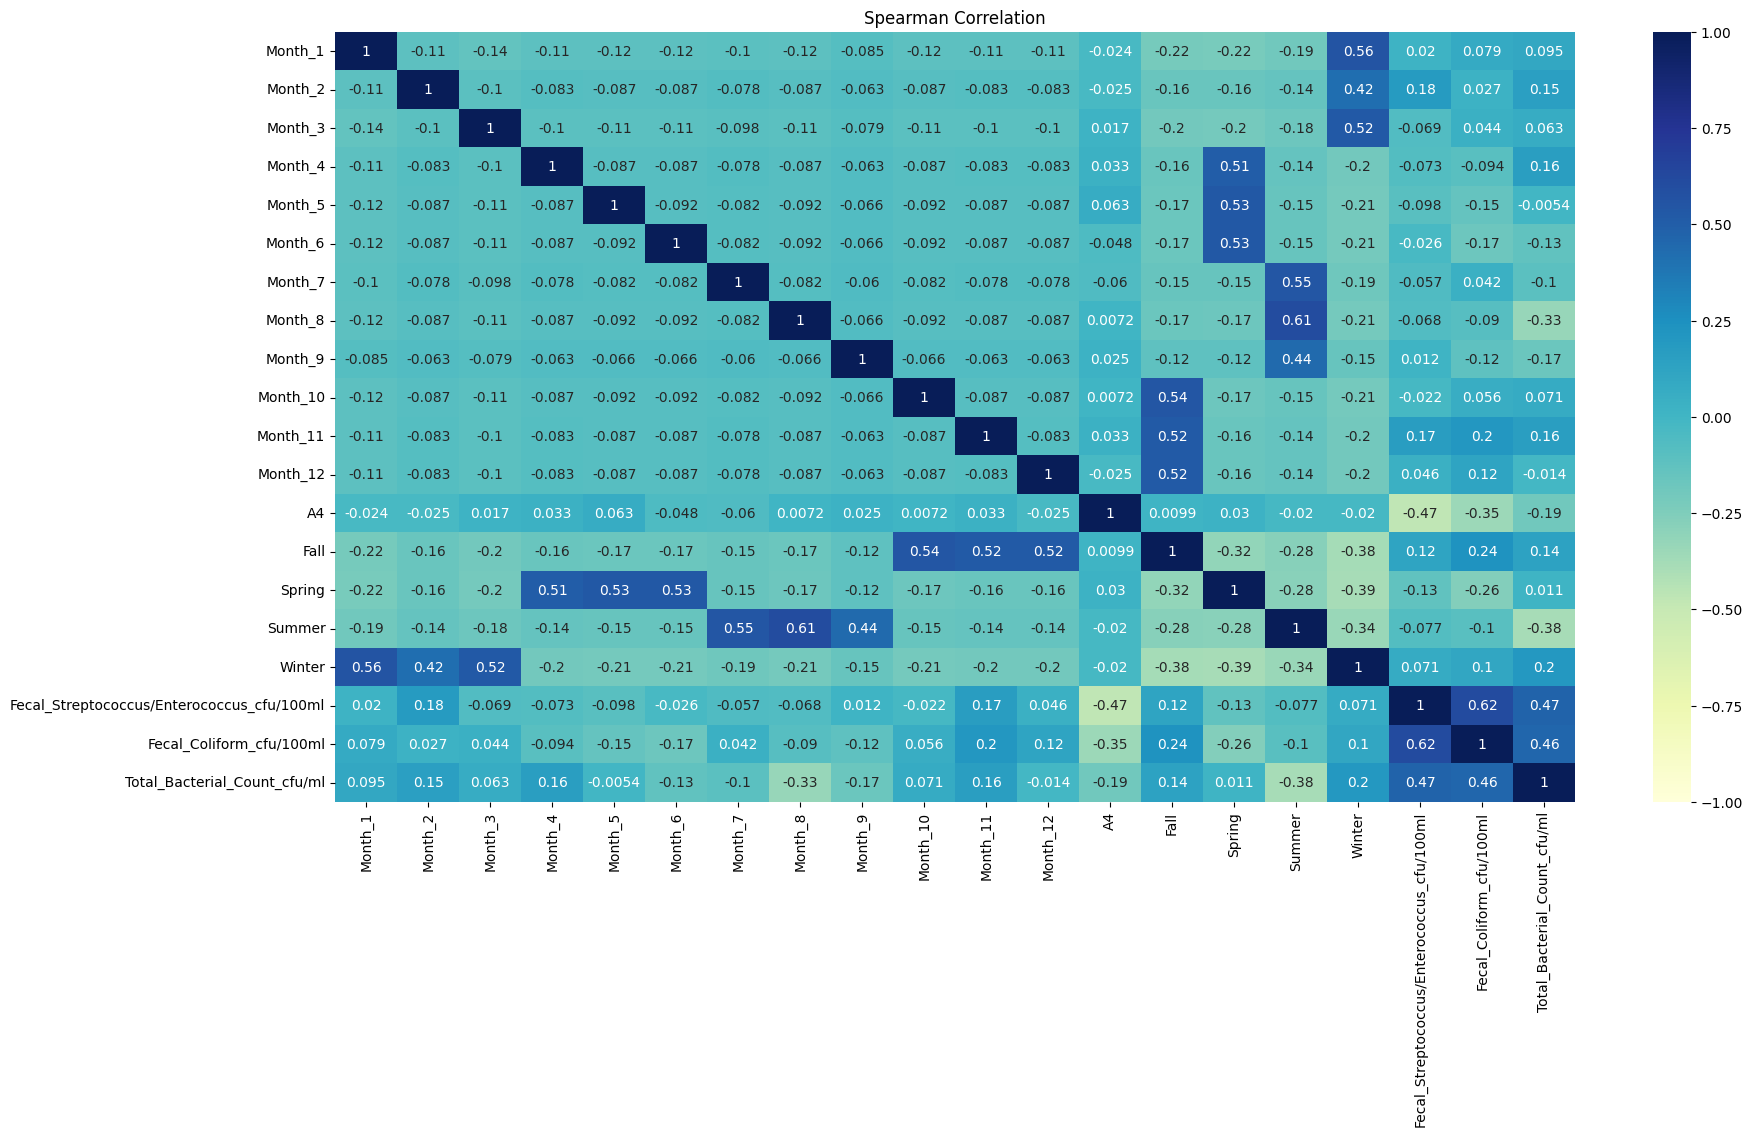

In [ ]:
display_correlation_spear(X)

In [ ]:

from scipy.stats import pearsonr


# Use the pearsonr() function to calculate the correlation coefficient and p-value
corr, pval = pearsonr(df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], df['Rain_Sum'])

# Print the correlation coefficient and p-value
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)


Pearson correlation coefficient: 0.31188305791334925
p-value: 0.0002874706026843899


In [ ]:
target = df[['Fecal_Streptococcus/Enterococcus_cfu/100ml']]

In [ ]:
T.head()

,Fecal_Streptococcus/Enterococcus_cfu/100ml,Total_Bacterial_Count_cfu/ml,Fecal_Coliform_cfu/100ml
0,1.897627,2.832509,1.505150
1,3.591065,4.041393,3.278754
2,3.176091,3.556303,2.531479
3,3.724276,4.361728,3.812913
4,3.505150,4.681241,NaN


# run the model without split the data to train and test.


##checking the coefficients of the features.

In [ ]:
# import seaborn as sns
# # linear vs polynomial trend line
# fig, axs = plt.subplots(ncols=4, sharex=True, sharey=True ,figsize=(14,5))
# sns.regplot(x='Salinity_(PSU)', y='Fecal_Streptococcus/Enterococcus_cfu/100ml', data=df, ci=None, order=1,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[0])
# # sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=2,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[1])
# # sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=3,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[2])
# # sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=12,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[3])

In [ ]:
df_without_target.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),...,Month_8,Month_9,Month_10,Month_11,Month_12,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,8.31,18.300,32.97,3.13,11.75,10.0,...,0,0,0,0,0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,1.71,3.700,268.30,4.83,19.05,21.0,...,0,0,0,0,0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,1.71,128.800,427.18,18.63,127.00,65.0,...,1,0,0,0,0,0,0,0,1,0
3,0.20,22.04,1.03,152.1,33.28,24.165,9.56,19.55,34.50,15.0,...,0,0,0,0,1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,0.09,3.000,9.96,12.03,23.20,14.8,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_without_target.drop(['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12',]
                       , axis=1 , inplace=True)

In [ ]:
df_without_target.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),...,Secchi_(m),clouds_(%),year,Holiday,Rain_Sum,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,8.31,18.300,32.97,3.13,11.75,10.0,...,0.38,0.1,2014,0,0.0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,1.71,3.700,268.30,4.83,19.05,21.0,...,0.58,0.0,2014,0,0.0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,1.71,128.800,427.18,18.63,127.00,65.0,...,0.38,0.0,2014,0,0.0,0,0,0,1,0
3,0.20,22.04,1.03,152.1,33.28,24.165,9.56,19.55,34.50,15.0,...,0.20,10.0,2014,0,16.1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,0.09,3.000,9.96,12.03,23.20,14.8,...,0.38,5.0,2015,0,28.4,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# # # select only the numeric columns using select_dtypes
numeric_cols = df_without_target.select_dtypes(include=['int', 'float']).columns

# # # # create a MinMaxScaler object
# scaler = MinMaxScaler()

# # # # fit and transform the numeric columns using the scaler and iloc indexer
# df_without_target.loc[:, numeric_cols] = scaler.fit_transform(df_without_target.loc[:, numeric_cols])



from sklearn.linear_model import LinearRegression
lm = LinearRegression()  # define our model using least square method
model = lm.fit(df_without_target,target)              # Fit our linear model
# The coefficients
coeff = lm.coef_[0]
intercept = lm.intercept_[0]


# Create a pandas DataFrame to store feature names and their corresponding coefficients
coef_df = pd.DataFrame({'feature': df_without_target.columns, 'coefficient': lm.coef_[0]})

# Sort the DataFrame by coefficient in descending order
sorted_coef_df = coef_df.sort_values(by='coefficient', ascending=False)

# Print the features coefficients
#print(sorted_coef_df)
sorted_coef_df = pd.DataFrame(sorted_coef_df)
sorted_coef_df


,feature,coefficient
0,Depth_(m),0.950389
23,Winter,0.113639
17,Holiday,0.024786
18,Rain_Sum,0.010601
9,POM_(mg/L),0.004329
7,BOD_5_(mg/L),0.004261
14,Secchi_(m),0.000521
8,TSS_(mg/L),0.000381
12,NO2_(uM/L),0.000347
6,Extracted_Chlorophyll_(ug/L),0.000330


## Split the data to train and test (30%) & GUI
#### Fecal_Streptococcus/Enterococcus_cfu/100ml

####GUI

In [ ]:
df_gui = df_without_target

In [ ]:
df_without_target.shape[1]

24

In [ ]:
df_gui.shape[1]

24

In [ ]:
df_gui.drop(['PO4_(uMol/L)', 'NH4_(uMol/L)', 'NO2_(uM/L)','Extracted_Chlorophyll_(ug/L)', 'TSS_(mg/L)','year','Holiday'],axis= 1, inplace = True)

In [ ]:
 df_gui.drop(['POM_(mg/L)', 'NO3_(uMol/L)'],axis= 1, inplace = True)

In [ ]:
df_gui.columns

Index(['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'BOD_5_(mg/L)', 'Secchi_(m)', 'clouds_(%)', 'Rain_Sum',
       'A4', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
df_gui.shape[1]

15

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()

# Create a random forest regressor object
rf = RandomForestRegressor()

# Train the model on the training data
model = rf.fit(df_gui, target)



<ipython-input-921-e1944430e52e>:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
 from google.colab import files
 import joblib
# # Save your trained machine learning model
 #joblib.dump(model, 'Desktop.pkl')
# # Download the model file
 #files.download('Desktop.pkl')

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Display the prediction result
    result_widget.value = f'Predicted class: {prediction[0]}'

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name, style={'description_width': 'initial'})
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict', button_style='success')

# Create a widget to display the prediction result
result_widget = widgets.Label(description='Prediction Result:', style={'font-weight': 'bold', 'margin-top': '10px'})

# Create a header widget
header_widget = widgets.HTML('<h2 style="color: #336699; text-align: center;">Bacterial Predictions</h2>')

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets, layout=widgets.Layout(margin='10px'))

# Create a layout for the widgets
vbox = widgets.VBox([header_widget, feature_widgets_layout, button, result_widget],
                    layout=widgets.Layout(width='400px', align_items='center'))

# Display the widgets
display(vbox)


In [ ]:
df_gui.shape[1]

15

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Update the result widget
    result_widget.value = f'<h3>Prediction Result:</h3><p style="font-size: 24px; color: white; margin-top: 10px;">{prediction[0]}</p>'
    result_widget.layout.align_self = 'center'  # Align the result to the center

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name)
    feature_widget.style.description_color = 'black'  # Set text color to black
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict', button_style='success')

# Create a widget to display the prediction result
result_widget = widgets.HTML()
result_widget.layout.align_self = 'center'  # Align the result to the center

# Create a header widget
header_widget = widgets.HTML('<h2 style="color: #0; text-align: center;">Bacterial Predictions</h2>')

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets, layout=widgets.Layout(margin='80px'))

# Create a layout for the widgets
vbox = widgets.VBox([header_widget, feature_widgets_layout, button, result_widget],
                    layout=widgets.Layout(width='1000px', align_items='center'))

# Set the background image
background_image = 'url("https://www.maariv.co.il/HttpHandlers/ShowImage.ashx?id=372383&w=690&h=407")'  # Replace with your image URL
background_style = f'''
    background-image: {background_image};
    background-repeat: no-repeat;
    background-size: cover;
'''

# Apply the background style
vbox.add_class('custom-background')

# Generate and display the HTML with custom CSS
html = f'<style>.custom-background {{ {background_style} }}</style>'
display(HTML(html))
display(vbox)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Update the result widget
    result_widget.value = f'<h3>Prediction Result:</h3><p style="font-size: 24px; color: white; margin-top: 10px;">{prediction[0]}</p>'

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name)
    feature_widget.style.description_color = 'black'  # Set text color to black
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict', button_style='success')

# Create a widget to display the prediction result
result_widget = widgets.HTML()

# Create a header widget
header_widget = widgets.HTML('<h2 style="color: #0; text-align: center;">Bacterial Predictions</h2>')

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets, layout=widgets.Layout(margin='80px'))

# Create a layout for the widgets
vbox = widgets.VBox([header_widget, feature_widgets_layout, button, result_widget],
                    layout=widgets.Layout(width='1000px', align_items='center'))

# Set the background image
background_image = 'url("https://www.maariv.co.il/HttpHandlers/ShowImage.ashx?id=372383&w=690&h=407")'  # Replace with your image URL
background_style = f'''
    background-image: {background_image};
    background-repeat: no-repeat;
    background-size: cover;
'''

# Apply the background style
vbox.add_class('custom-background')

# Generate and display the HTML with custom CSS
html = f'<style>.custom-background {{ {background_style} }}</style>'
display(HTML(html))
display(vbox)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Display the prediction result
    result_widget.value = f'Predicted class: {prediction[0]}'

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name)
    feature_widget.style.description_color = 'black'  # Set text color to black
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict', button_style='success')

# Create a widget to display the prediction result
result_widget = widgets.Label(description='Prediction Result:', style={'font-weight': 'bold', 'margin-top': '10px'})

# Create a header widget
header_widget = widgets.HTML('<h2 style="color: #0; text-align: center;">Bacterial Predictions</h2>')

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets, layout=widgets.Layout(margin='80px'))

# Create a layout for the widgets
vbox = widgets.VBox([header_widget, feature_widgets_layout, button, result_widget],
                    layout=widgets.Layout(width='1000px', align_items='center'))

# Set the background image
background_image = 'url("https://www.maariv.co.il/HttpHandlers/ShowImage.ashx?id=372383&w=690&h=407")'  # Replace with your image URL
background_style = f'''
    background-image: {background_image};
    background-repeat: no-repeat;
    background-size: cover;
'''

# Apply the background style
vbox.add_class('custom-background')

# Generate and display the HTML with custom CSS
html = f'<style>.custom-background {{ {background_style} }}</style>'
display(HTML(html))
display(vbox)


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Display the prediction result
    result_widget.value = f'<h3>Predicted class:</h3><p style="font-size: 24px; color: blue; margin-top: 10px;">{prediction[0]}</p>'

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name, style={'description_width': 'initial'})
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Click here for prediction', button_style='success')

# Create a widget to display the prediction result
result_widget = widgets.HTML()

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets, layout=widgets.Layout(align_items='center'))

# Create a layout for the widgets
vbox = widgets.VBox([widgets.HTML("<h2 style='color: #336699; text-align: center;'>Bacterial Predictor</h2>"),
                     feature_widgets_layout,
                     button,
                     widgets.HTML("<hr style='margin-top: 20px;'>"),
                     result_widget],
                    layout=widgets.Layout(align_items='center'))

# Set the style of the widgets
vbox.add_class('custom-container')
button.add_class('custom-button')

# Set the background color of the result widget
result_widget.add_class('result-widget')

# Display the widgets
display(vbox)


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load your trained machine learning model
model = joblib.load('Desktop.pkl')
feature_names = df_gui.columns

# Create textbox widgets for each feature
feature_widgets = []

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [float(feature_widget.value) for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Display the prediction result
    result_widget.value = f'Predicted class: {prediction[0]}'

for feature_name in feature_names:
    feature_widget = widgets.FloatText(description=feature_name)
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict')

# Create a widget to display the prediction result
result_widget = widgets.Label(description='Prediction Result:')

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets)

# Create a layout for the widgets
vbox = widgets.VBox([feature_widgets_layout, button, result_widget])

# Display the widgets
display(vbox)


### Split the data to train and test (30%-70%)

#### Fecal_Streptococcus/Enterococcus_cfu/100ml

In [ ]:
df_without_target.columns

Index(['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'BOD_5_(mg/L)', 'Secchi_(m)', 'clouds_(%)', 'Rain_Sum',
       'A4', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:


#df_without_target.drop(['Holiday','NO3_(uMol/L)','POM_(mg/L)'],axis= 1, inplace = True)

In [ ]:
copy.columns

Index(['Depth_(m)', 'Temp_(degC)', 'Salinity_(PSU)', 'DO_(uM)', 'OBS_(NTU)',
       'Chl_Fluo_(AU)', 'BOD_5_(mg/L)', 'Secchi_(m)', 'clouds_(%)', 'Rain_Sum',
       'A4', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
copy = df_without_target.copy()

In [ ]:
df_without_target =copy.copy()

In [ ]:
df_without_target.drop(['Chl_Fluo_(AU)', 'BOD_5_(mg/L)'],axis= 1, inplace = True)

In [ ]:
df_without_target.drop(['Secchi_(m)','clouds_(%)', 'Spring' ],axis= 1, inplace = True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target, test_size=0.3, random_state=1234)

train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Rain_Sum,A4,Fall,Summer,Winter,Fecal_Streptococcus/Enterococcus_cfu/100ml
28,0.30,24.55,5.00,217.00,11.73,0.4,1,0,0,0,2.230449
52,0.30,14.40,6.00,160.90,12.20,24.3,1,1,0,0,2.556303
214,0.20,28.59,0.88,20.40,296.55,0.0,0,0,1,0,2.033424
216,0.20,29.57,6.70,149.78,43.29,0.0,1,0,1,0,1.838849
184,0.20,15.30,22.46,188.50,33.75,5.9,1,1,0,0,1.361728
142,0.20,19.24,27.77,157.48,11.04,28.6,1,1,0,0,2.170262
26,0.10,24.54,1.02,2.00,33.13,0.4,0,0,0,0,3.447158
234,0.20,14.78,0.83,202.84,71.40,15.8,0,0,0,1,2.826075
165,0.41,28.00,0.89,13.47,87.41,0.0,0,0,0,0,2.643453
220,0.20,25.64,6.87,206.63,44.48,3.5,1,0,1,0,2.414973


In [ ]:

from sklearn.preprocessing import StandardScaler

x_train_scaler = StandardScaler()
#y_train_scaler = StandardScaler()

X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)

#y_train_scaled = y_train_scaler.fit_transform(pd.DataFrame(y_train))
#y_test_scaled = y_train_scaler.transform(pd.DataFrame(y_test))



##Linear Reggression model

In [ ]:
#df_without_target = df[['Depth_(m)', 'POM_(mg/L)', 'Rain_Sum','TSS_(mg/L)' ,'Extracted_Chlorophyll_(ug/L)' ,'Salinity_(PSU)' ,'DO_(uM)',
#'PO4_(uMol/L)'	, 'Temp_(degC)'	,'NH4_(uMol/L)'	 , 'NO3_(uMol/L)','NO2_(uM/L)','OBS_(NTU)']]

In [ ]:
df_without_target.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),POM_(mg/L),NO3_(uMol/L),Secchi_(m),clouds_(%),year,Rain_Sum,A4,Fall,Spring,Summer,Winter
0,0.14,22.16,0.69,442.0,8.31,18.300,10.0,262.79,0.38,0.1,2014,0.0,0,0,0,0,1
1,0.10,29.35,0.97,301.0,1.71,3.700,21.0,34.97,0.58,0.0,2014,0.0,0,0,1,0,0
2,0.20,29.15,0.96,182.0,1.71,128.800,65.0,213.63,0.38,0.0,2014,0.0,0,0,0,1,0
3,0.20,22.04,1.03,152.1,33.28,24.165,15.0,124.01,0.20,10.0,2014,16.1,0,1,0,0,0
4,0.20,15.45,0.73,184.0,0.09,3.000,14.8,467.86,0.38,5.0,2015,28.4,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target, test_size=0.3, random_state=1234)

# standardize training and testing data
x_train_scaler = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled training data
fitted_scaled_target1 = lm.predict(X_train_scaled)

# create Pandas series from predicted training target
predicted_train_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_train.index, name='Predicted_train_target1').round(2)

# add predicted training target to training data
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
train_df = pd.merge(left=train_df, right=predicted_train_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(train_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], train_df.Predicted_train_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], train_df.Predicted_train_target1)))
print("MAE:",metrics.mean_absolute_error(train_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], train_df.Predicted_train_target1))


####### TEST

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled testing data
fitted_scaled_target1 = lm.predict(X_test_scaled)

# create Pandas series from predicted testing target
predicted_test_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_test.index, name='Predicted_test_target1').round(2)

# add predicted testing target to testing data
test_df = pd.merge(left=pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index), right=y_test, left_index=True, right_index=True)
test_df = pd.merge(left=test_df, right=predicted_test_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(test_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], test_df.Predicted_test_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], test_df.Predicted_test_target1)))
print("MAE:",metrics.mean_absolute_error(test_df['Fecal_Streptococcus/Enterococcus_cfu/100ml'], test_df.Predicted_test_target1))


------ TRAIN DATA ------
MSE: 0.3073385875058247
RMSE: 0.5543812654715388
MAE: 0.42664076517235844
------ TEST DATA ------
MSE: 0.38770773814643755
RMSE: 0.6226618168367462
MAE: 0.4786823183671073


## Random Forest model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()

In [ ]:


# Create a random forest regressor object
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = rf.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = rf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE_TRAIN:", mse_train)

# Calculate the RMSE on the training data

rmse_train = np.sqrt(mse_train)
print("RMSE_TRAIN:", rmse_train)

mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE_TEST:", mse_test)
# Calculate the RMSE on the test data
rmse_test = np.sqrt(mse_test)
print("RMSE_TEST:", rmse_test)




MSE_TRAIN: 0.049740134757464416
RMSE_TRAIN: 0.22302496442655118
MSE_TEST: 0.39444234709240533
RMSE_TEST: 0.6280464529733492


<ipython-input-958-c06a0d0d295e>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
train_df

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),POM_(mg/L),NO3_(uMol/L),Secchi_(m),clouds_(%),year,Rain_Sum,A4,Fall,Spring,Summer,Winter,Fecal_Streptococcus/Enterococcus_cfu/100ml
28,0.3,24.55,5.00,217.00,11.73,218.5000,23.07,306.80,0.25,10.0,2016,0.4,1,0,1,0,0,2.230449
52,0.3,14.40,6.00,160.90,12.20,95.7000,12.50,125.90,0.38,90.0,2016,24.3,1,1,0,0,0,2.556303
214,0.2,28.59,0.88,20.40,296.55,23.0700,34.90,222.87,0.00,10.0,2021,0.0,0,0,0,1,0,2.033424
216,0.2,29.57,6.70,149.78,43.29,23.0700,21.60,94.69,0.00,10.0,2021,0.0,1,0,0,1,0,1.838849
184,0.2,15.30,22.46,188.50,33.75,4.0501,17.00,299.00,64.00,0.0,2020,5.9,1,1,0,0,0,1.361728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.2,24.80,0.90,74.50,0.60,23.0700,68.00,305.91,0.00,10.0,2021,3.5,0,0,0,1,0,3.505150
140,0.1,16.32,0.54,224.65,23.87,6.4000,14.80,473.62,0.26,80.0,2018,28.6,0,1,0,0,0,2.173186
92,0.3,26.43,9.36,322.79,15.09,113.3700,24.00,110.17,0.33,30.0,2017,0.0,1,0,0,1,0,1.602060
62,0.1,14.44,0.81,101.41,32.66,118.5400,43.33,130.60,0.22,100.0,2017,31.2,0,0,0,0,1,3.041393


In [ ]:

column2_index = train_df.columns.get_loc('Rain_Sum')

print(column2_index)

11


In [ ]:

# Get feature importances
importances = rf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Print the top 10 most important features with their indices
n_top_features = 10
for i in range(n_top_features):
    print(f"Feature {i + 1}: Index {indices[i]}, Importance {importances[indices[i]]}")


Feature 1: Index 2, Importance 0.36920308014275804
Feature 2: Index 3, Importance 0.14556112472867172
Feature 3: Index 6, Importance 0.07503606882311137
Feature 4: Index 1, Importance 0.0734367598307264
Feature 5: Index 10, Importance 0.07214428453816475
Feature 6: Index 4, Importance 0.06404236223789173
Feature 7: Index 7, Importance 0.04956496408825938
Feature 8: Index 5, Importance 0.040543050775940566
Feature 9: Index 8, Importance 0.03656107317625808
Feature 10: Index 11, Importance 0.03626290232352982


In [ ]:
target.std()

Fecal_Streptococcus/Enterococcus_cfu/100ml    0.737222
dtype: float64

In [ ]:
train_df.head()

,Depth_(m),Temp_(degC),Salinity_(PSU),DO_(uM),OBS_(NTU),Chl_Fluo_(AU),Extracted_Chlorophyll_(ug/L),BOD_5_(mg/L),TSS_(mg/L),POM_(mg/L),...,year,Holiday,Rain_Sum,A4,Fall,Spring,Summer,Winter,Fecal_Streptococcus/Enterococcus_cfu/100ml,Predicted_train_target1
28,0.3,24.55,5.00,217.00,11.73,218.5000,173.06,19.95,52.00,23.07,...,2016,0,0.4,1,0,1,0,0,2.230449,2.29
52,0.3,14.40,6.00,160.90,12.20,95.7000,59.02,45.50,19.50,12.50,...,2016,0,24.3,1,1,0,0,0,2.556303,2.46
214,0.2,28.59,0.88,20.40,296.55,23.0700,112.57,40.30,147.30,34.90,...,2021,0,0.0,0,0,0,1,0,2.033424,3.10
216,0.2,29.57,6.70,149.78,43.29,23.0700,96.35,16.90,46.15,21.60,...,2021,0,0.0,1,0,0,1,0,1.838849,2.07
184,0.2,15.30,22.46,188.50,33.75,4.0501,1.48,13.50,107.33,17.00,...,2020,0,5.9,1,1,0,0,0,1.361728,2.09


###train

In [ ]:
# Train the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_train = rf.predict(X_train_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared error:", mse)


rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse: ", rmse)

target.std()

<ipython-input-179-cac27c1ea4d3>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean squared error: 0.050195391343122155
rmse:  0.22404328006687046


Fecal_Streptococcus/Enterococcus_cfu/100ml    0.737222
dtype: float64

####cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model
scores = cross_val_score(rf, X_test_scaled, y_test, cv=5, scoring='neg_root_mean_squared_error')

# Print the RMSE for each fold
print(f'RMSE for each fold: {-scores}')
# Print the mean and standard deviation of the RMSE scores
print(f'Mean RMSE: {np.mean(-scores)}')
print(f'Standard deviation RMSE: {np.std(-scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RMSE for each fold: [0.39864654 0.40074981 0.51437127 0.82980296 0.72775665]
Mean RMSE: 0.5742654465664007
Standard deviation RMSE: 0.17515476410284506


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



###test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test = rf.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_test)
print("Mean squared error:", mse)


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse: ", rmse)



<ipython-input-181-0b1b04159b92>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean squared error: 0.3775890193079309
rmse:  0.614482724987392


In [ ]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse: ", rmse)

rmse:  0.614482724987392


In [ ]:
# import joblib
# joblib.dump(rf, 'model.joblib')

In [ ]:
target.std()

In [ ]:
#create a pandas series of the results
predicted_train_target1 = pd.Series(y_pred_test, index=y_test.index, name='Predicted_train_target1').round(2)

predicted_train_target1

fitted_target1 =y_test
#Add the results to the DF
test_df = pd.merge(left=test_df, right=predicted_train_target1 , left_index=True, right_index=True)
test_df

## The second model
#### Fecal_Coliform_cfu/100ml

####RANDOM FOREST TARGET 2

In [ ]:
median = df['Fecal_Coliform_cfu/100ml'].median()
df['Fecal_Coliform_cfu/100ml'].fillna(median, inplace=True)

In [ ]:
target2 = df[['Fecal_Coliform_cfu/100ml']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target2, test_size=0.3, random_state=1234)

train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)
from sklearn.preprocessing import StandardScaler

x_train_scaler = StandardScaler()
#y_train_scaler = StandardScaler()

X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)
# Create a random forest regressor object
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = rf.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = rf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE_TRAIN:", mse_train)

# Calculate the RMSE on the training data

rmse_train = np.sqrt(mse_train)
print("RMSE_TRAIN:", rmse_train)

mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE_TEST:", mse_test)
# Calculate the RMSE on the test data
rmse_test = np.sqrt(mse_test)
print("RMSE_TEST:", rmse_test)


MSE_TRAIN: 0.11331333260147512
RMSE_TRAIN: 0.33662045778810756
MSE_TEST: 0.951893360709656
RMSE_TEST: 0.9756502245731592


<ipython-input-177-b936a8342f78>:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
df_without_target.head()

####MULTI REGGRESION TARGET 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target2, test_size=0.3, random_state=1234)

# standardize training and testing data
x_train_scaler = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled training data
fitted_scaled_target1 = lm.predict(X_train_scaled)

# create Pandas series from predicted training target
predicted_train_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_train.index, name='Predicted_train_target1').round(2)

# add predicted training target to training data
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
train_df = pd.merge(left=train_df, right=predicted_train_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(train_df['Fecal_Coliform_cfu/100ml'], train_df.Predicted_train_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df['Fecal_Coliform_cfu/100ml'], train_df.Predicted_train_target1)))
print("MAE:",metrics.mean_absolute_error(train_df['Fecal_Coliform_cfu/100ml'], train_df.Predicted_train_target1))


In [ ]:

####### TEST

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled testing data
fitted_scaled_target1 = lm.predict(X_test_scaled)

# create Pandas series from predicted testing target
predicted_test_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_test.index, name='Predicted_test_target1').round(2)

# add predicted testing target to testing data
test_df = pd.merge(left=pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index), right=y_test, left_index=True, right_index=True)
test_df = pd.merge(left=test_df, right=predicted_test_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(test_df['Fecal_Coliform_cfu/100ml'], test_df.Predicted_test_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df['Fecal_Coliform_cfu/100ml'], test_df.Predicted_test_target1)))
print("MAE:",metrics.mean_absolute_error(test_df['Fecal_Coliform_cfu/100ml'], test_df.Predicted_test_target1))

In [ ]:
df['Fecal_Coliform_cfu/100ml'].std()

#### TOTAL BACTRIEL TARGET 3

In [ ]:
df_without_target.shape

In [ ]:
target3 = df[['Total_Bacterial_Count_cfu/ml']]

In [ ]:
target3.isnull().sum()

In [ ]:
target3

In [ ]:
median = target3['Total_Bacterial_Count_cfu/ml'].median()
target3['Total_Bacterial_Count_cfu/ml'].fillna(median, inplace=True)

<ipython-input-179-ad4e78ad7600>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#####RANDOM FOREST TARGET 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target3, test_size=0.3, random_state=1234)

train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)
from sklearn.preprocessing import StandardScaler

x_train_scaler = StandardScaler()
#y_train_scaler = StandardScaler()

X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)
# Create a random forest regressor object
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = rf.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = rf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE_TRAIN:", mse_train)

# Calculate the RMSE on the training data

rmse_train = np.sqrt(mse_train)
print("RMSE_TRAIN:", rmse_train)

mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE_TEST:", mse_test)
# Calculate the RMSE on the test data
rmse_test = np.sqrt(mse_test)
print("RMSE_TEST:", rmse_test)

MSE_TRAIN: 0.05250049858253564
RMSE_TRAIN: 0.22912987274149924
MSE_TEST: 0.3322832931101338
RMSE_TEST: 0.5764401904015141


<ipython-input-180-d7c5eb95041c>:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



##### MULTI REGGRESION TARGET 3

In [ ]:
df_without_target.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_target, target3, test_size=0.3, random_state=1234)

# standardize training and testing data
x_train_scaler = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled training data
fitted_scaled_target1 = lm.predict(X_train_scaled)

# create Pandas series from predicted training target
predicted_train_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_train.index, name='Predicted_train_target1').round(2)

# add predicted training target to training data
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
train_df = pd.merge(left=train_df, right=predicted_train_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(train_df['Total_Bacterial_Count_cfu/ml'], train_df.Predicted_train_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df['Total_Bacterial_Count_cfu/ml'], train_df.Predicted_train_target1)))
print("MAE:",metrics.mean_absolute_error(train_df['Total_Bacterial_Count_cfu/ml'], train_df.Predicted_train_target1))

In [ ]:

####### TEST

# fit linear regression model on scaled data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict target variable on scaled testing data
fitted_scaled_target1 = lm.predict(X_test_scaled)

# create Pandas series from predicted testing target
predicted_test_target1 = pd.Series(fitted_scaled_target1.ravel(), index=y_test.index, name='Predicted_test_target1').round(2)

# add predicted testing target to testing data
test_df = pd.merge(left=pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index), right=y_test, left_index=True, right_index=True)
test_df = pd.merge(left=test_df, right=predicted_test_target1, left_index=True, right_index=True)

from sklearn import metrics

print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(test_df['Total_Bacterial_Count_cfu/ml'], test_df.Predicted_test_target1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df['Total_Bacterial_Count_cfu/ml'], test_df.Predicted_test_target1)))
print("MAE:",metrics.mean_absolute_error(test_df['Total_Bacterial_Count_cfu/ml'], test_df.Predicted_test_target1))

In [ ]:
df['Total_Bacterial_Count_cfu/ml'].std()

###a


In [ ]:
from google.colab import files
import joblib
# Save your trained machine learning model
joblib.dump(model, 'path/to/your/model.pkl')
# Download the model file
files.download('path/to/your/model.pkl')





import ipywidgets as widgets
from IPython.display import display
import joblib
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load your trained machine learning model
model = joblib.load('path/to/your/model.pkl')

# Create input widgets for each feature
feature_widgets = []
for i in range(32):
    feature_widget = widgets.FloatText(description=f'Feature {i+1}:')
    feature_widgets.append(feature_widget)

# Create a button widget
button = widgets.Button(description='Predict')

# Create a widget to display the prediction result
result_widget = widgets.Label(description='Prediction Result:')

def predict_button_clicked(b):
    # Retrieve input values
    input_features = [feature_widget.value for feature_widget in feature_widgets]

    # Perform prediction
    prediction = model.predict([input_features])

    # Display the prediction result
    result_widget.value = f'Predicted class: {prediction[0]}'

# Attach the function to the button's on_click event
button.on_click(predict_button_clicked)

# Create a layout for the feature widgets
feature_widgets_layout = widgets.VBox(feature_widgets)

# Create a layout for the widgets
vbox = widgets.VBox([feature_widgets_layout, button, result_widget])

# Create a scrollable container for the layout
scrollable_container = widgets.ScrollPane()
scrollable_container.content = vbox
scrollable_container.layout.height = '400px'

# Display the scrollable container
display(scrollable_container)
